In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch . nn as nn
import torch . optim as optim
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [2]:
Train_data = pd.read_csv('Train_MM_Int.csv')
Validation_data = pd.read_csv('Valid_MM_Int.csv')
Test_data = pd.read_csv('Test_MM_Int.csv')
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  12000 non-null  int64  
 1   Age                         12000 non-null  float64
 2   AnnualIncome                12000 non-null  float64
 3   CreditScore                 12000 non-null  float64
 4   EmploymentStatus            12000 non-null  float64
 5   EducationLevel              12000 non-null  float64
 6   Experience                  12000 non-null  float64
 7   LoanAmount                  12000 non-null  float64
 8   LoanDuration                12000 non-null  float64
 9   MaritalStatus               12000 non-null  float64
 10  NumberOfDependents          12000 non-null  float64
 11  HomeOwnershipStatus         12000 non-null  float64
 12  MonthlyDebtPayments         12000 non-null  float64
 13  CreditCardUtilizationRate   120

In [3]:
Train_data.head()

,Unnamed: 0,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,0,0.629032,0.068100,0.455285,0.0,0.00,0.573770,0.067100,0.111111,0.333333,...,0.039867,0.614466,0.1250,0.012799,0.382726,0.441758,0.070022,0.120071,0.0,0.402174
1,1,0.209677,0.063154,0.661247,0.0,0.75,0.098361,0.213760,0.666667,0.333333,...,0.104225,0.622996,0.3750,0.036481,0.522959,0.645749,0.110911,0.089347,0.0,0.384058
2,2,0.354839,0.152409,0.720867,0.0,0.75,0.295082,0.077842,0.222222,0.000000,...,0.251523,0.626327,0.1250,0.013550,0.247945,0.305184,0.053450,0.032016,0.0,0.438406
3,3,0.661290,0.409754,0.875339,0.0,0.50,0.590164,0.088966,0.444444,0.333333,...,0.676225,0.874832,0.1875,0.027415,0.224353,0.214225,0.038018,0.007892,1.0,0.086957
4,4,0.225806,0.083607,0.626016,0.0,1.00,0.196721,0.185708,0.333333,0.000000,...,0.137979,0.600710,0.2500,0.003406,0.419008,0.392349,0.104443,0.080741,0.0,0.438406


In [4]:
X_training = Train_data.drop('LoanApproved',axis=1)
X_training = X_training.drop('Unnamed: 0',axis=1)
X_training = X_training.drop('RiskScore',axis=1)
y_training = Train_data['LoanApproved']

In [19]:
y_training.min()

0.0

In [5]:
X_validation = Validation_data.drop('LoanApproved',axis=1)
X_validation = X_validation.drop('RiskScore',axis=1)
X_validation = X_validation.drop('Unnamed: 0',axis=1)
y_validation = Validation_data['LoanApproved']

In [6]:
X_testing = Test_data.drop('LoanApproved',axis=1)
X_testing = X_testing.drop('RiskScore',axis=1)
X_testing = X_testing.drop('Unnamed: 0',axis=1)
y_testing = Test_data['LoanApproved']

In [7]:
class SingleLayer(nn.Module):
    def __init__(self, input_size, hidden1):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(input_size, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, 1),
        nn.Sigmoid()
        )
    def forward(self, x):
        return self.layers(x)

In [8]:
X_training = X_training.values
y_training = y_training.values
X_validation = X_validation.values
y_validation = y_validation.values
X_testing = X_testing.values
y_testing = y_testing.values

In [9]:
print(y_training)

[0. 0. 0. ... 1. 0. 0.]


In [10]:
X_train, y_train = torch.tensor(X_training, dtype=torch.float32), torch.tensor(y_training, dtype=torch.float32).view(-1, 1)
X_val, y_val = torch.tensor(X_validation, dtype=torch.float32), torch.tensor(y_validation, dtype=torch.float32).view(-1, 1)
X_test, y_test = torch.tensor(X_testing, dtype=torch.float32), torch.tensor(y_testing, dtype=torch.float32).view(-1, 1)

In [11]:
print(X_training.shape)

(12000, 33)


Training Losses are 
          0
0  0.714858
1  0.712747
2  0.710653
3  0.708577
4  0.706520
Validation Data
Confusion Matrix for hidden layer 8
[[3044    0]
 [ 908   48]]
Accuracy: 0.7730, Precision: 1.0000, Recall: 0.0502, F1-score: 0.0956

Test Data
Confusion Matrix for hiden layer 8
[[3044    0]
 [ 904   52]]
Accuracy: 0.7740, Precision: 1.0000, Recall: 0.0544, F1-score: 0.1032



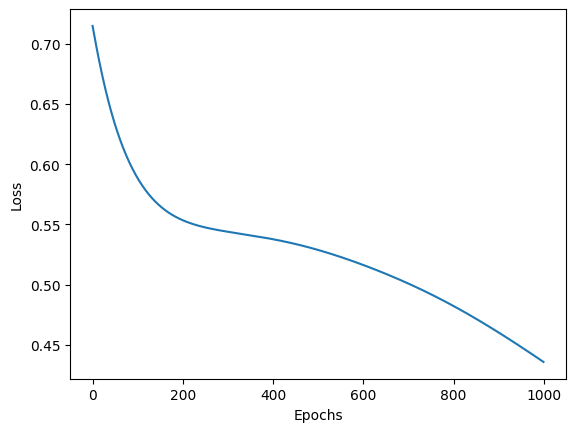

Training Losses are 
          0
0  0.827016
1  0.822205
2  0.817440
3  0.812721
4  0.808051
Validation Data
Confusion Matrix for hidden layer 16
[[3042    2]
 [ 757  199]]
Accuracy: 0.8103, Precision: 0.9900, Recall: 0.2082, F1-score: 0.3440

Test Data
Confusion Matrix for hiden layer 16
[[3042    2]
 [ 758  198]]
Accuracy: 0.8100, Precision: 0.9900, Recall: 0.2071, F1-score: 0.3426



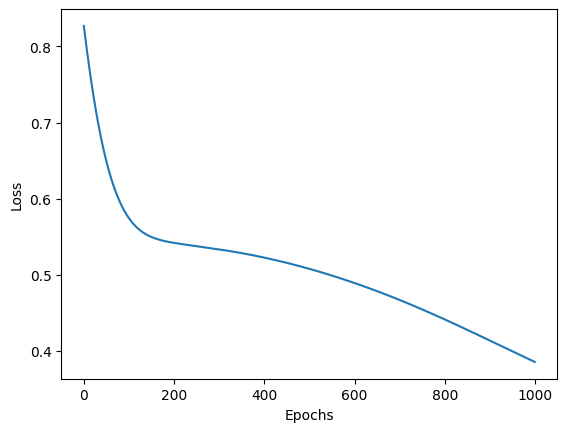

Training Losses are 
          0
0  0.895553
1  0.886218
2  0.877032
3  0.867997
4  0.859115
Validation Data
Confusion Matrix for hidden layer 32
[[3027   17]
 [ 544  412]]
Accuracy: 0.8598, Precision: 0.9604, Recall: 0.4310, F1-score: 0.5949

Test Data
Confusion Matrix for hiden layer 32
[[3025   19]
 [ 531  425]]
Accuracy: 0.8625, Precision: 0.9572, Recall: 0.4446, F1-score: 0.6071



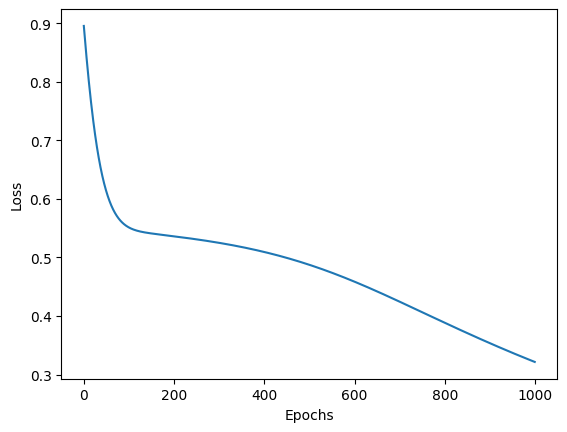

Training Losses are 
          0
0  0.825382
1  0.809718
2  0.794533
3  0.779835
4  0.765634
Validation Data
Confusion Matrix for hidden layer 64
[[3007   37]
 [ 302  654]]
Accuracy: 0.9153, Precision: 0.9465, Recall: 0.6841, F1-score: 0.7942

Test Data
Confusion Matrix for hiden layer 64
[[3006   38]
 [ 295  661]]
Accuracy: 0.9167, Precision: 0.9456, Recall: 0.6914, F1-score: 0.7988



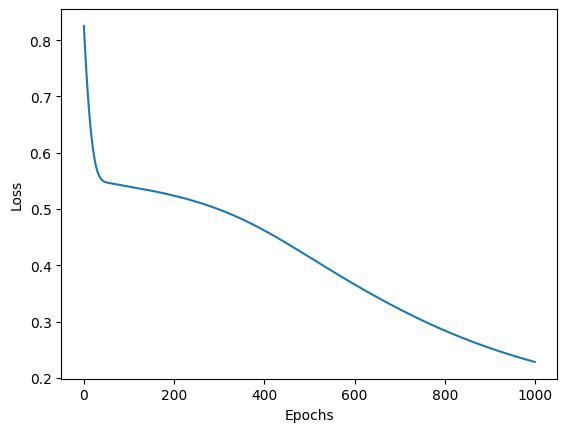

Training Losses are 
          0
0  0.632214
1  0.617634
2  0.604563
3  0.593000
4  0.582927
Validation Data
Confusion Matrix for hidden layer 128
[[2986   58]
 [ 166  790]]
Accuracy: 0.9440, Precision: 0.9316, Recall: 0.8264, F1-score: 0.8758

Test Data
Confusion Matrix for hiden layer 128
[[2979   65]
 [ 155  801]]
Accuracy: 0.9450, Precision: 0.9249, Recall: 0.8379, F1-score: 0.8793



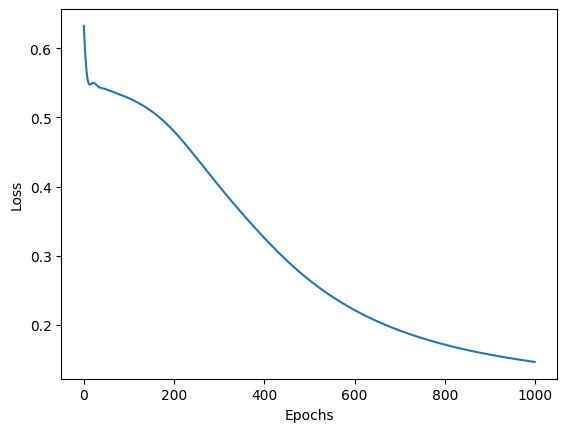

Best accuracy for test data is 0.945 for degree 128


In [12]:
nuerons = [8,16,32,64,128]
min_loss_2 = 0
best_degree_2 = 1000
for nueron in nuerons:
  model = SingleLayer(33,nueron)
  criterion = nn.BCELoss() #Binary Classifiaction Loss
  optimizer = optim.Adam(model.parameters(), lr=0.001)
  epochs=1000
  loss_arr=[]
  for i in range(epochs):
        optimizer.zero_grad()
        model.train()
        outputs=model(X_train)
        outputs = outputs.view(-1, 1)
        loss = criterion(outputs, y_train.float())
        loss_arr.append(loss.detach().numpy())
        loss.backward()
        optimizer.step()
  print("Training Losses are ")
  loss_df = pd.DataFrame(loss_arr)
  print(loss_df.head())
  y_val_pred=model(X_val)
  y_val_pred=(y_val_pred>0.5).float()
  cm = confusion_matrix(y_val, y_val_pred)
  acc = accuracy_score(y_val, y_val_pred)
  precision = precision_score(y_val.numpy(), y_val_pred.numpy())
  recall = recall_score(y_val.numpy(), y_val_pred.numpy())
  f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
  print("Validation Data")
  print(f"Confusion Matrix for hidden layer {nueron}")
  print(cm)
  print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
  y_test_pred=model(X_test)
  y_test_pred=(y_test_pred>0.5).float()
  cm = confusion_matrix(y_test, y_test_pred)
  acc = accuracy_score(y_test, y_test_pred)
  if acc > min_loss_2:
    min_loss_2 = acc
    best_degree_2 = nueron
  precision = precision_score(y_test.numpy(), y_test_pred.numpy())
  recall = recall_score(y_test.numpy(), y_test_pred.numpy())
  f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
  print("Test Data")
  print(f"Confusion Matrix for hiden layer {nueron}")
  print(cm)
  print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
  plt.plot(range(epochs), loss_arr)
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.show()
print(f"Best accuracy for test data is {min_loss_2} for degree {best_degree_2}")
  #HARDWARE PROBELM MIGHT WORK BETTER WITH A GOOD HARDWARE

In [13]:
class DoubleLayer(nn.Module):
    def __init__(self, input_size, hidden1, hidden2):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(input_size, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, hidden2),
        nn.Sigmoid(),
        nn.Linear(hidden2, 1),
        nn.Sigmoid()
        )
    def forward(self, x):
        return self.layers(x)

Training Losses are 
          0
0  0.634104
1  0.632859
2  0.631623
3  0.630397
4  0.629180
Validation Data
Confusion Matrix for hidden layer 8 and 8
[[3043    1]
 [ 767  189]]
Accuracy: 0.8080, Precision: 0.9947, Recall: 0.1977, F1-score: 0.3298

Test Data
Confusion Matrix for hiden layer 8 and 8
[[3043    1]
 [ 758  198]]
Accuracy: 0.8103, Precision: 0.9950, Recall: 0.2071, F1-score: 0.3429



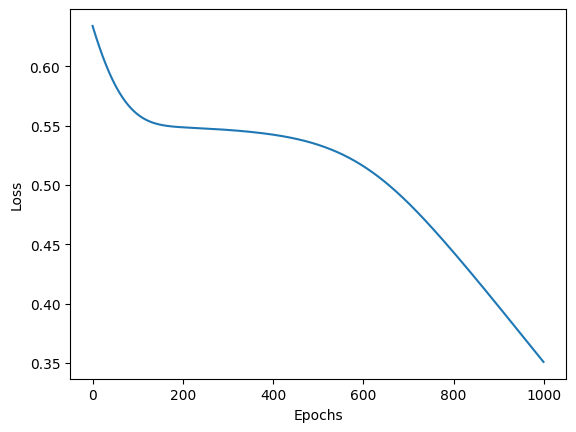

Training Losses are 
          0
0  0.691150
1  0.688222
2  0.685325
3  0.682462
4  0.679631
Validation Data
Confusion Matrix for hidden layer 8 and 16
[[3031   13]
 [ 552  404]]
Accuracy: 0.8588, Precision: 0.9688, Recall: 0.4226, F1-score: 0.5885

Test Data
Confusion Matrix for hiden layer 8 and 16
[[3028   16]
 [ 557  399]]
Accuracy: 0.8568, Precision: 0.9614, Recall: 0.4174, F1-score: 0.5821



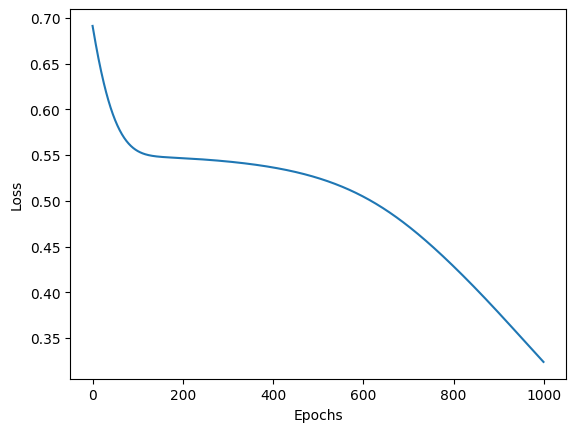

Training Losses are 
          0
0  0.731702
1  0.725506
2  0.719424
3  0.713457
4  0.707606
Validation Data
Confusion Matrix for hidden layer 8 and 32
[[3005   39]
 [ 326  630]]
Accuracy: 0.9087, Precision: 0.9417, Recall: 0.6590, F1-score: 0.7754

Test Data
Confusion Matrix for hiden layer 8 and 32
[[3008   36]
 [ 310  646]]
Accuracy: 0.9135, Precision: 0.9472, Recall: 0.6757, F1-score: 0.7888



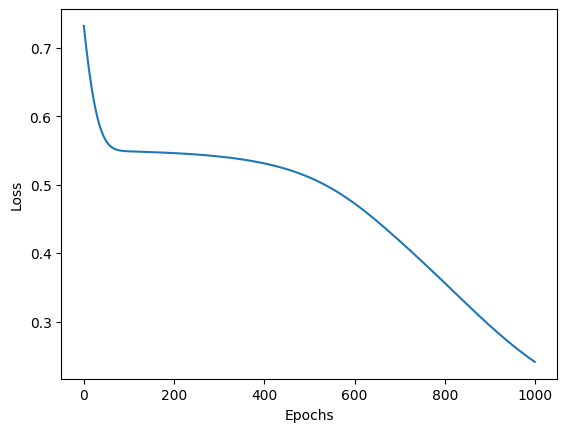

Training Losses are 
          0
0  0.835976
1  0.822056
2  0.808497
3  0.795306
4  0.782489
Validation Data
Confusion Matrix for hidden layer 8 and 64
[[2999   45]
 [ 254  702]]
Accuracy: 0.9253, Precision: 0.9398, Recall: 0.7343, F1-score: 0.8244

Test Data
Confusion Matrix for hiden layer 8 and 64
[[2999   45]
 [ 250  706]]
Accuracy: 0.9263, Precision: 0.9401, Recall: 0.7385, F1-score: 0.8272



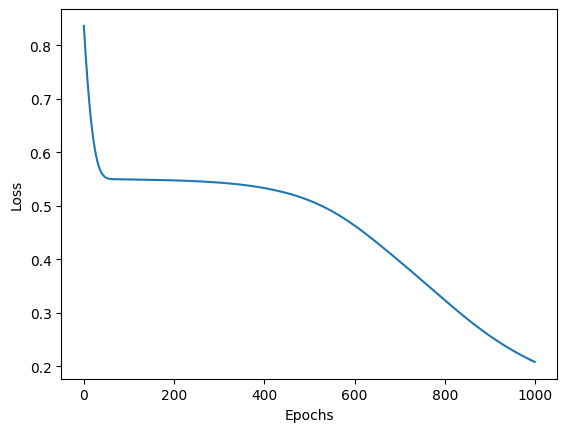

Training Losses are 
          0
0  0.593652
1  0.592399
2  0.591161
3  0.589938
4  0.588730
Validation Data
Confusion Matrix for hidden layer 16 and 8
[[3039    5]
 [ 462  494]]
Accuracy: 0.8832, Precision: 0.9900, Recall: 0.5167, F1-score: 0.6790

Test Data
Confusion Matrix for hiden layer 16 and 8
[[3037    7]
 [ 451  505]]
Accuracy: 0.8855, Precision: 0.9863, Recall: 0.5282, F1-score: 0.6880



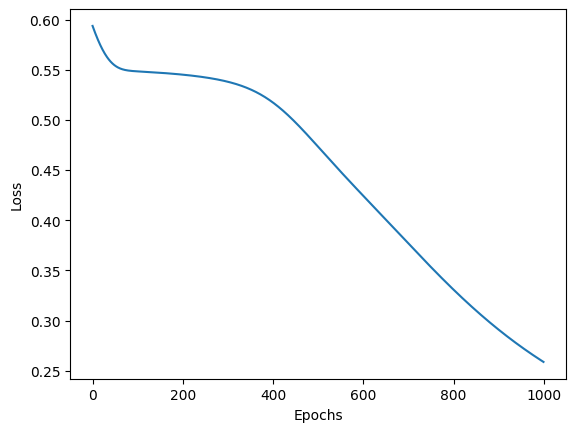

Training Losses are 
          0
0  0.632804
1  0.629949
2  0.627146
3  0.624394
4  0.621695
Validation Data
Confusion Matrix for hidden layer 16 and 16
[[3000   44]
 [ 231  725]]
Accuracy: 0.9313, Precision: 0.9428, Recall: 0.7584, F1-score: 0.8406

Test Data
Confusion Matrix for hiden layer 16 and 16
[[2997   47]
 [ 227  729]]
Accuracy: 0.9315, Precision: 0.9394, Recall: 0.7626, F1-score: 0.8418



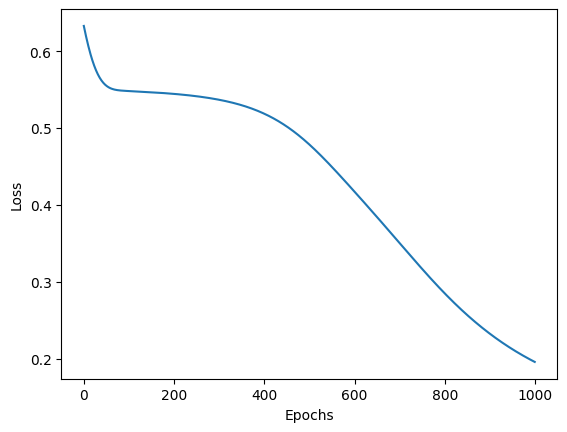

Training Losses are 
          0
0  0.685449
1  0.679705
2  0.674090
3  0.668607
4  0.663257
Validation Data
Confusion Matrix for hidden layer 16 and 32
[[2992   52]
 [ 202  754]]
Accuracy: 0.9365, Precision: 0.9355, Recall: 0.7887, F1-score: 0.8558

Test Data
Confusion Matrix for hiden layer 16 and 32
[[2990   54]
 [ 193  763]]
Accuracy: 0.9383, Precision: 0.9339, Recall: 0.7981, F1-score: 0.8607



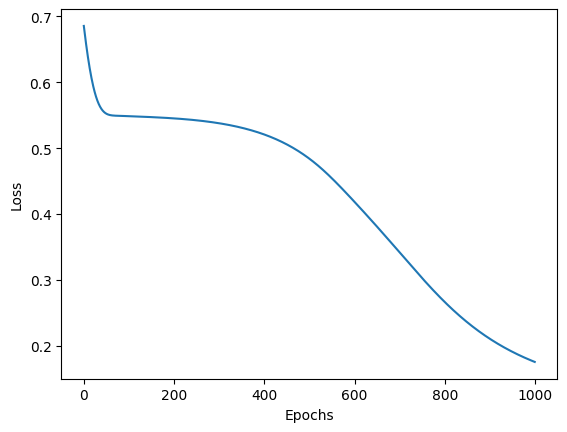

Training Losses are 
          0
0  0.672215
1  0.662432
2  0.653094
3  0.644206
4  0.635771
Validation Data
Confusion Matrix for hidden layer 16 and 64
[[2971   73]
 [ 147  809]]
Accuracy: 0.9450, Precision: 0.9172, Recall: 0.8462, F1-score: 0.8803

Test Data
Confusion Matrix for hiden layer 16 and 64
[[2969   75]
 [ 133  823]]
Accuracy: 0.9480, Precision: 0.9165, Recall: 0.8609, F1-score: 0.8878



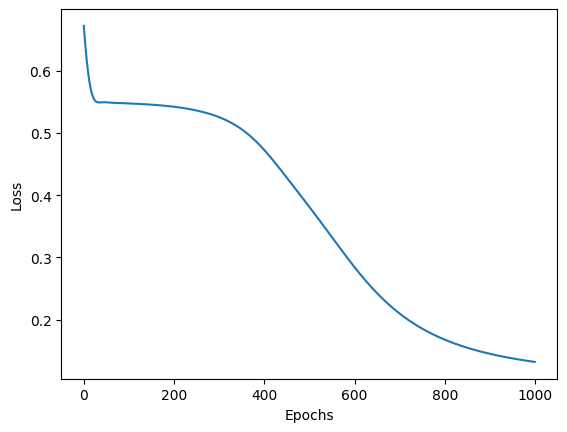

Training Losses are 
          0
0  0.722777
1  0.719437
2  0.716140
3  0.712888
4  0.709680
Validation Data
Confusion Matrix for hidden layer 32 and 8
[[3013   31]
 [ 343  613]]
Accuracy: 0.9065, Precision: 0.9519, Recall: 0.6412, F1-score: 0.7662

Test Data
Confusion Matrix for hiden layer 32 and 8
[[3012   32]
 [ 328  628]]
Accuracy: 0.9100, Precision: 0.9515, Recall: 0.6569, F1-score: 0.7772



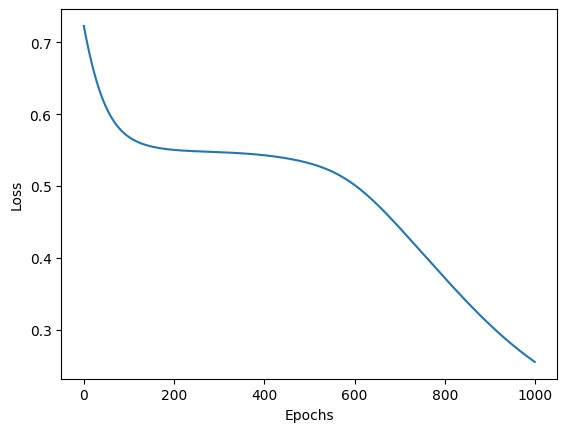

Training Losses are 
          0
0  0.928163
1  0.920482
2  0.912899
3  0.905418
4  0.898038
Validation Data
Confusion Matrix for hidden layer 32 and 16
[[3033   11]
 [ 632  324]]
Accuracy: 0.8393, Precision: 0.9672, Recall: 0.3389, F1-score: 0.5019

Test Data
Confusion Matrix for hiden layer 32 and 16
[[3033   11]
 [ 642  314]]
Accuracy: 0.8367, Precision: 0.9662, Recall: 0.3285, F1-score: 0.4902



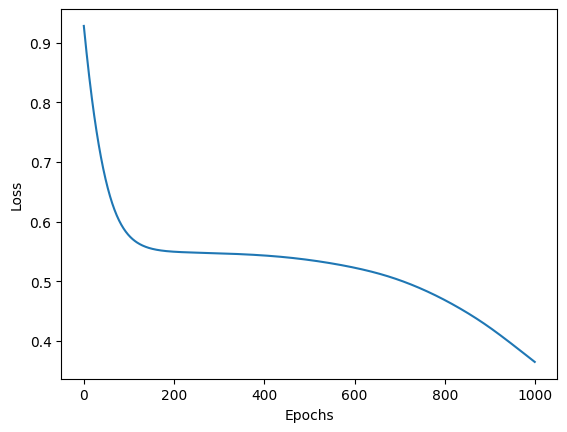

Training Losses are 
          0
0  0.640282
1  0.634617
2  0.629139
3  0.623850
4  0.618752
Validation Data
Confusion Matrix for hidden layer 32 and 32
[[2964   80]
 [ 146  810]]
Accuracy: 0.9435, Precision: 0.9101, Recall: 0.8473, F1-score: 0.8776

Test Data
Confusion Matrix for hiden layer 32 and 32
[[2970   74]
 [ 129  827]]
Accuracy: 0.9493, Precision: 0.9179, Recall: 0.8651, F1-score: 0.8907



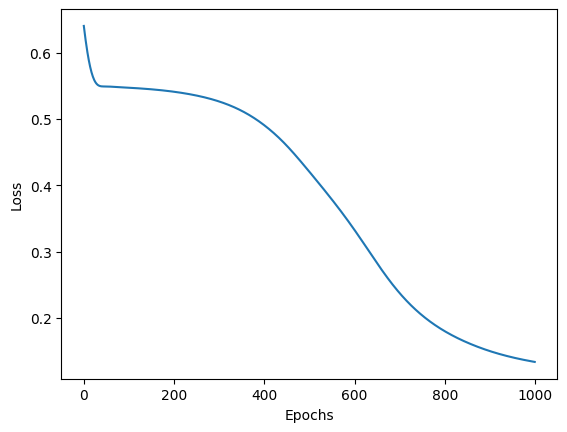

Training Losses are 
          0
0  0.797187
1  0.780648
2  0.764730
3  0.749444
4  0.734794
Validation Data
Confusion Matrix for hidden layer 32 and 64
[[2970   74]
 [ 158  798]]
Accuracy: 0.9420, Precision: 0.9151, Recall: 0.8347, F1-score: 0.8731

Test Data
Confusion Matrix for hiden layer 32 and 64
[[2969   75]
 [ 142  814]]
Accuracy: 0.9457, Precision: 0.9156, Recall: 0.8515, F1-score: 0.8824



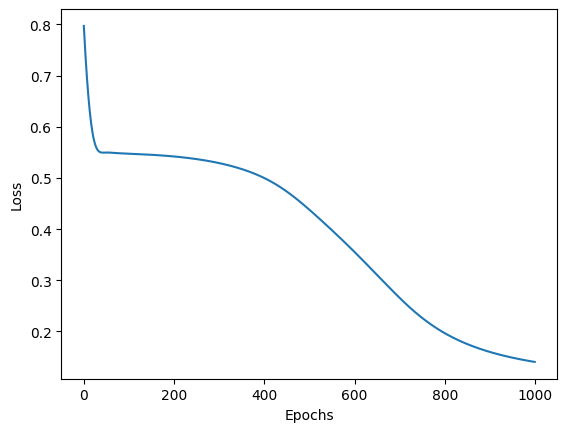

Training Losses are 
          0
0  0.620910
1  0.617229
2  0.613653
3  0.610184
4  0.606826
Validation Data
Confusion Matrix for hidden layer 64 and 8
[[2970   74]
 [ 147  809]]
Accuracy: 0.9447, Precision: 0.9162, Recall: 0.8462, F1-score: 0.8798

Test Data
Confusion Matrix for hiden layer 64 and 8
[[2970   74]
 [ 134  822]]
Accuracy: 0.9480, Precision: 0.9174, Recall: 0.8598, F1-score: 0.8877



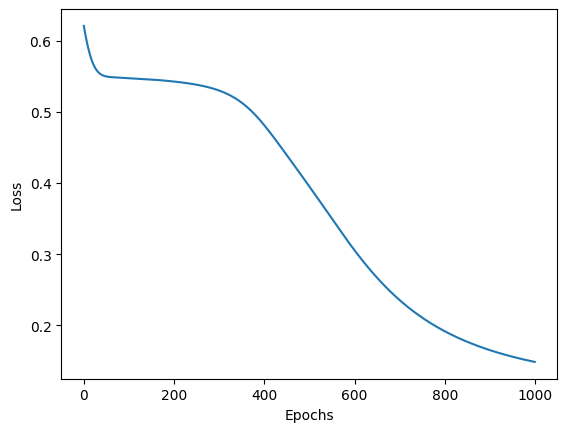

Training Losses are 
          0
0  0.684153
1  0.677135
2  0.670313
3  0.663694
4  0.657282
Validation Data
Confusion Matrix for hidden layer 64 and 16
[[2968   76]
 [ 139  817]]
Accuracy: 0.9463, Precision: 0.9149, Recall: 0.8546, F1-score: 0.8837

Test Data
Confusion Matrix for hiden layer 64 and 16
[[2963   81]
 [ 125  831]]
Accuracy: 0.9485, Precision: 0.9112, Recall: 0.8692, F1-score: 0.8897



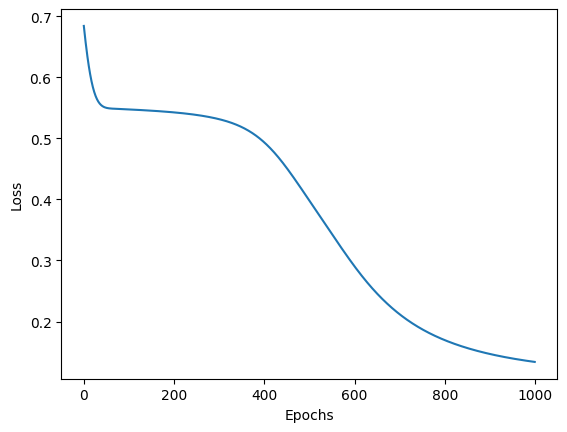

Training Losses are 
          0
0  0.679644
1  0.669706
2  0.660203
3  0.651140
4  0.642522
Validation Data
Confusion Matrix for hidden layer 64 and 32
[[2964   80]
 [ 126  830]]
Accuracy: 0.9485, Precision: 0.9121, Recall: 0.8682, F1-score: 0.8896

Test Data
Confusion Matrix for hiden layer 64 and 32
[[2962   82]
 [ 110  846]]
Accuracy: 0.9520, Precision: 0.9116, Recall: 0.8849, F1-score: 0.8981



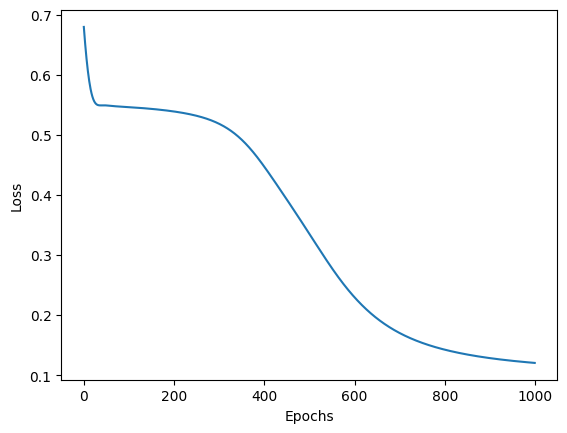

Training Losses are 
          0
0  0.595114
1  0.585932
2  0.577856
3  0.570886
4  0.565006
Validation Data
Confusion Matrix for hidden layer 64 and 64
[[2955   89]
 [ 111  845]]
Accuracy: 0.9500, Precision: 0.9047, Recall: 0.8839, F1-score: 0.8942

Test Data
Confusion Matrix for hiden layer 64 and 64
[[2959   85]
 [  92  864]]
Accuracy: 0.9557, Precision: 0.9104, Recall: 0.9038, F1-score: 0.9071



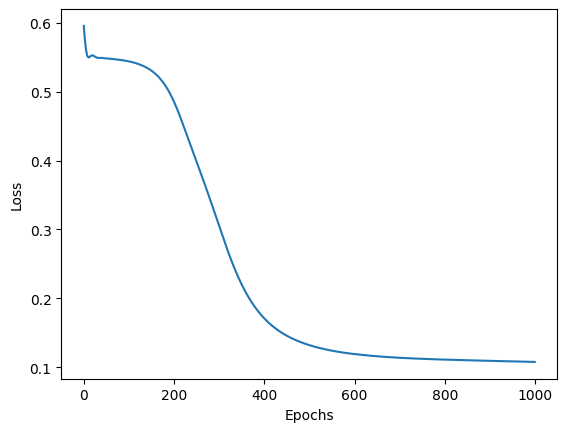

Best accuracy for test data is 0.95575 for degree 64 & 64


In [14]:
nuerons = [8,16,32,64]
best_degree_3=0
best_accuracy_2=0
layer_abc=0
for nueron in nuerons:
  for double_nueron in nuerons:
    model = DoubleLayer(33,nueron,double_nueron)
    criterion = nn.BCELoss() #Binary Classifiaction Loss
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    epochs=1000
    loss_arr=[]
    for i in range(epochs):
          optimizer.zero_grad()
          model.train()
          outputs=model(X_train)
          outputs = outputs.view(-1, 1)
          loss = criterion(outputs, y_train.float())
          loss_arr.append(loss.detach().numpy())
          loss.backward()
          optimizer.step()
    print("Training Losses are ")
    loss_df = pd.DataFrame(loss_arr)
    print(loss_df.head())
    y_val_pred=model(X_val)
    y_val_pred=(y_val_pred>0.5).float()
    cm = confusion_matrix(y_val, y_val_pred)
    acc = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val.numpy(), y_val_pred.numpy())
    recall = recall_score(y_val.numpy(), y_val_pred.numpy())
    f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
    print("Validation Data")
    print(f"Confusion Matrix for hidden layer {nueron} and {double_nueron}")
    print(cm)
    print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
    y_test_pred=model(X_test)
    y_test_pred=(y_test_pred>0.5).float()
    cm = confusion_matrix(y_test, y_test_pred)
    acc = accuracy_score(y_test, y_test_pred)
    if acc > best_accuracy_2:
          best_accuracy_2=acc
          best_degree_4=nueron
          layer_abc = double_nueron
    precision = precision_score(y_test.numpy(), y_test_pred.numpy())
    recall = recall_score(y_test.numpy(), y_test_pred.numpy())
    f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
    print("Test Data")
    print(f"Confusion Matrix for hiden layer {nueron} and {double_nueron}")
    print(cm)
    print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
    plt.plot(range(epochs), loss_arr)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
print(f"Best accuracy for test data is {best_accuracy_2} for degree {best_degree_4} & {layer_abc}")

In [15]:
class TripleLayer(nn.Module):
    def __init__(self, input_size, hidden1, hidden2,hidden3):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(input_size, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, hidden2),
        nn.Sigmoid(),
        nn.Linear(hidden2, hidden3),
        nn.Sigmoid(),
        nn.Linear(hidden3, 1),
        nn.Sigmoid()
        )
    def forward(self, x):
        return self.layers(x)

Training Losses are 
          0
0  0.580614
1  0.579827
2  0.579051
3  0.578285
4  0.577530
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 8
[[3024   20]
 [ 345  611]]
Accuracy: 0.9087, Precision: 0.9683, Recall: 0.6391, F1-score: 0.7700

Test Data
Confusion Matrix for hiden layer 8 and 8 and 8
[[3021   23]
 [ 327  629]]
Accuracy: 0.9125, Precision: 0.9647, Recall: 0.6579, F1-score: 0.7823



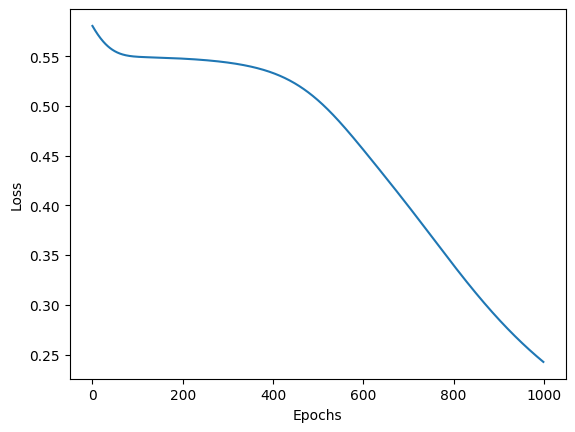

Training Losses are 
          0
0  0.652239
1  0.650806
2  0.649381
3  0.647963
4  0.646552
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


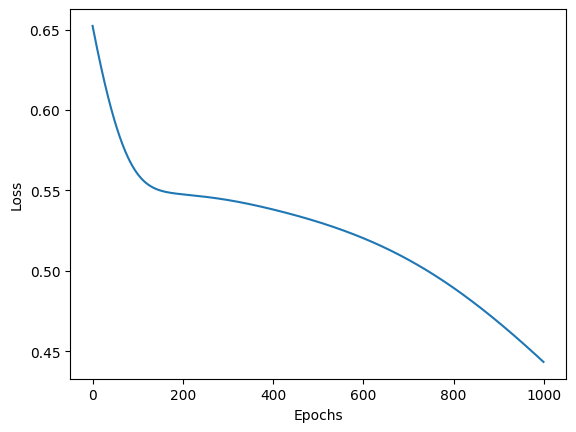

Training Losses are 
          0
0  0.782991
1  0.780820
2  0.778660
3  0.776512
4  0.774375
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


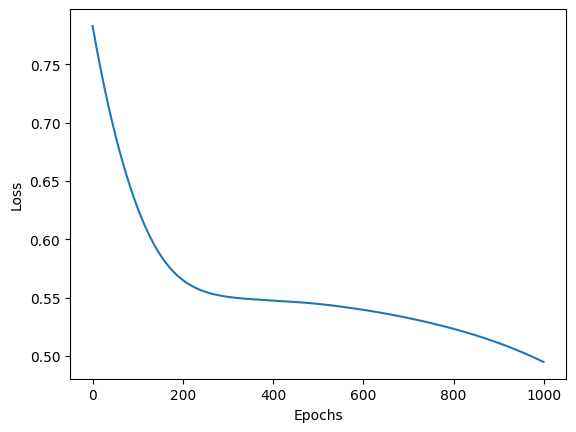

Training Losses are 
          0
0  0.766849
1  0.764361
2  0.761890
3  0.759436
4  0.756999
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 8 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


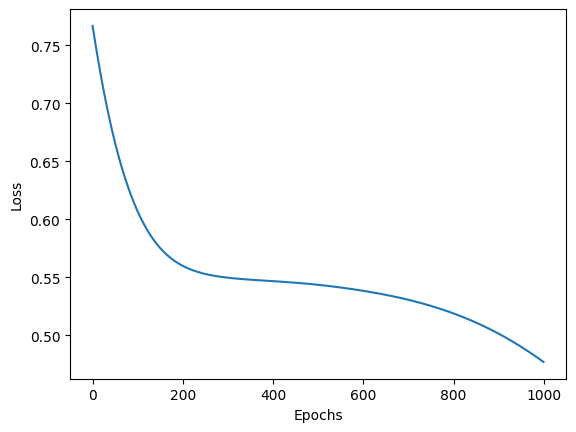

Training Losses are 
          0
0  0.703011
1  0.699798
2  0.696621
3  0.693483
4  0.690383
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 8
[[3028   16]
 [ 563  393]]
Accuracy: 0.8552, Precision: 0.9609, Recall: 0.4111, F1-score: 0.5758

Test Data
Confusion Matrix for hiden layer 8 and 16 and 8
[[3024   20]
 [ 574  382]]
Accuracy: 0.8515, Precision: 0.9502, Recall: 0.3996, F1-score: 0.5626



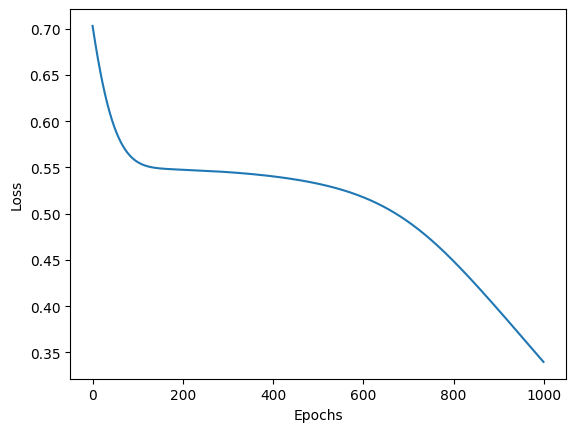

Training Losses are 
          0
0  0.808259
1  0.803965
2  0.799715
3  0.795509
4  0.791348
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 16 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


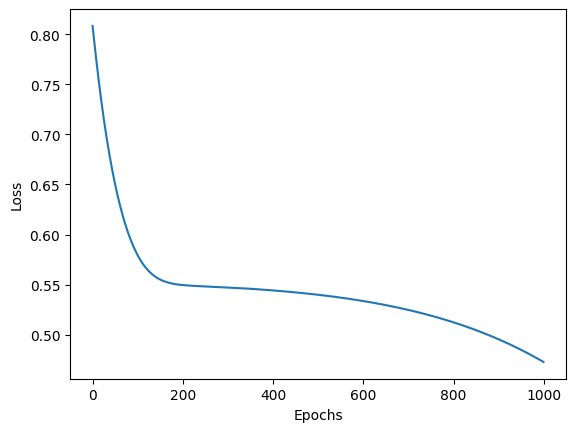

Training Losses are 
          0
0  0.749072
1  0.745485
2  0.741934
3  0.738418
4  0.734938
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 32
[[3042    2]
 [ 753  203]]
Accuracy: 0.8113, Precision: 0.9902, Recall: 0.2123, F1-score: 0.3497

Test Data
Confusion Matrix for hiden layer 8 and 16 and 32
[[3038    6]
 [ 749  207]]
Accuracy: 0.8113, Precision: 0.9718, Recall: 0.2165, F1-score: 0.3541



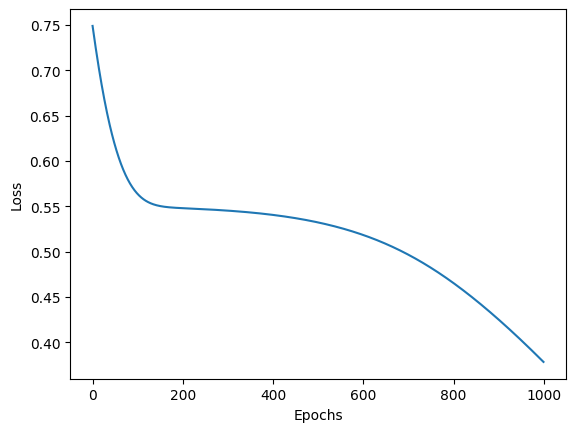

Training Losses are 
          0
0  0.689658
1  0.686452
2  0.683283
3  0.680150
4  0.677055
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 64
[[3043    1]
 [ 824  132]]
Accuracy: 0.7937, Precision: 0.9925, Recall: 0.1381, F1-score: 0.2424

Test Data
Confusion Matrix for hiden layer 8 and 16 and 64
[[3040    4]
 [ 817  139]]
Accuracy: 0.7947, Precision: 0.9720, Recall: 0.1454, F1-score: 0.2530



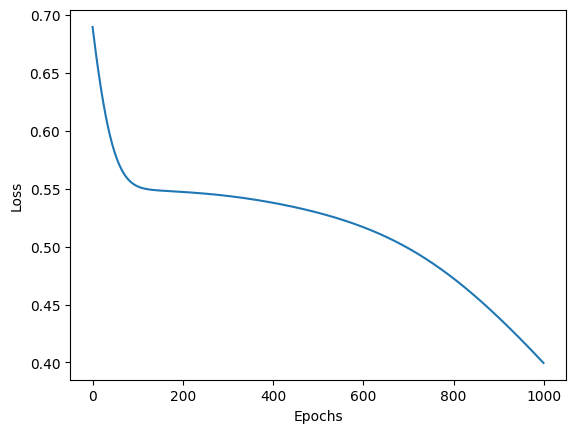

Training Losses are 
          0
0  0.700588
1  0.694759
2  0.689059
3  0.683489
4  0.678051
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 8
[[3002   42]
 [ 248  708]]
Accuracy: 0.9275, Precision: 0.9440, Recall: 0.7406, F1-score: 0.8300

Test Data
Confusion Matrix for hiden layer 8 and 32 and 8
[[2998   46]
 [ 251  705]]
Accuracy: 0.9257, Precision: 0.9387, Recall: 0.7374, F1-score: 0.8260



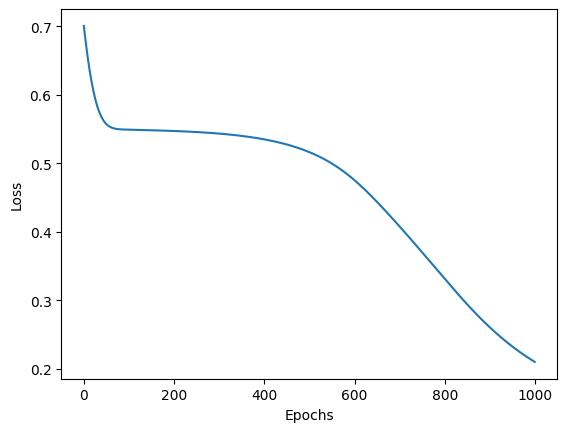

Training Losses are 
          0
0  0.748447
1  0.742042
2  0.735749
3  0.729570
4  0.723509
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 16
[[3016   28]
 [ 403  553]]
Accuracy: 0.8922, Precision: 0.9518, Recall: 0.5785, F1-score: 0.7196

Test Data
Confusion Matrix for hiden layer 8 and 32 and 16
[[3010   34]
 [ 378  578]]
Accuracy: 0.8970, Precision: 0.9444, Recall: 0.6046, F1-score: 0.7372



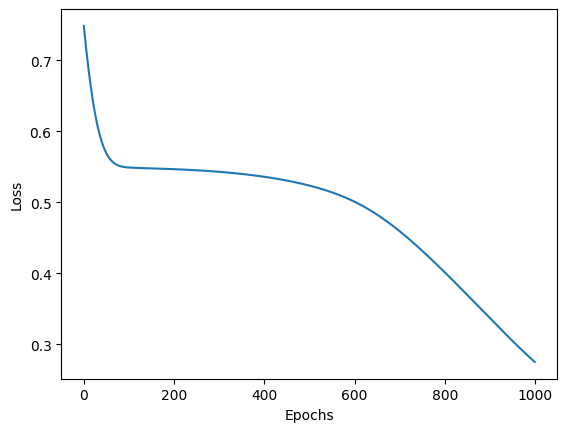

Training Losses are 
          0
0  0.746756
1  0.740560
2  0.734474
3  0.728502
4  0.722643
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 32
[[3005   39]
 [ 309  647]]
Accuracy: 0.9130, Precision: 0.9431, Recall: 0.6768, F1-score: 0.7881

Test Data
Confusion Matrix for hiden layer 8 and 32 and 32
[[3007   37]
 [ 297  659]]
Accuracy: 0.9165, Precision: 0.9468, Recall: 0.6893, F1-score: 0.7978



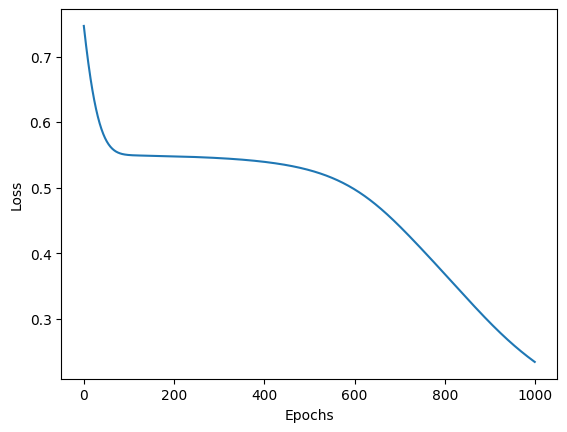

Training Losses are 
          0
0  0.818524
1  0.811581
2  0.804733
3  0.797982
4  0.791331
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 64
[[3033   11]
 [ 615  341]]
Accuracy: 0.8435, Precision: 0.9688, Recall: 0.3567, F1-score: 0.5214

Test Data
Confusion Matrix for hiden layer 8 and 32 and 64
[[3024   20]
 [ 621  335]]
Accuracy: 0.8397, Precision: 0.9437, Recall: 0.3504, F1-score: 0.5111



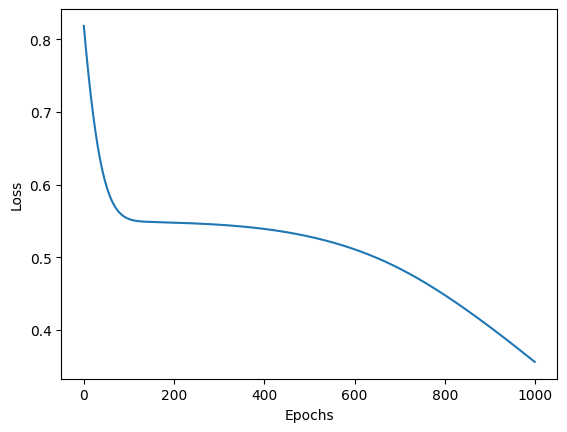

Training Losses are 
          0
0  0.627556
1  0.620441
2  0.613701
3  0.607336
4  0.601350
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 8
[[2972   72]
 [ 146  810]]
Accuracy: 0.9455, Precision: 0.9184, Recall: 0.8473, F1-score: 0.8814

Test Data
Confusion Matrix for hiden layer 8 and 64 and 8
[[2972   72]
 [ 128  828]]
Accuracy: 0.9500, Precision: 0.9200, Recall: 0.8661, F1-score: 0.8922



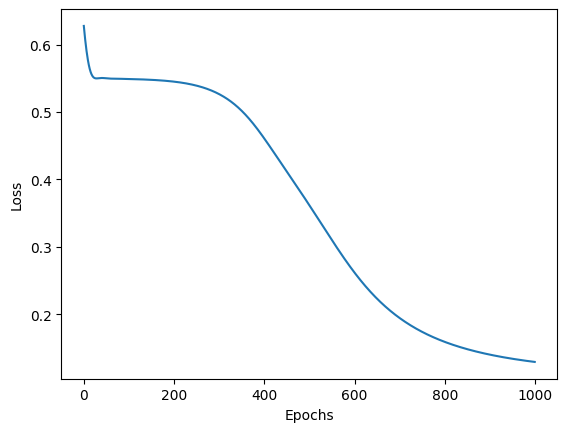

Training Losses are 
          0
0  0.839011
1  0.824692
2  0.810761
3  0.797224
4  0.784087
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 16
[[2995   49]
 [ 209  747]]
Accuracy: 0.9355, Precision: 0.9384, Recall: 0.7814, F1-score: 0.8527

Test Data
Confusion Matrix for hiden layer 8 and 64 and 16
[[2991   53]
 [ 208  748]]
Accuracy: 0.9347, Precision: 0.9338, Recall: 0.7824, F1-score: 0.8515



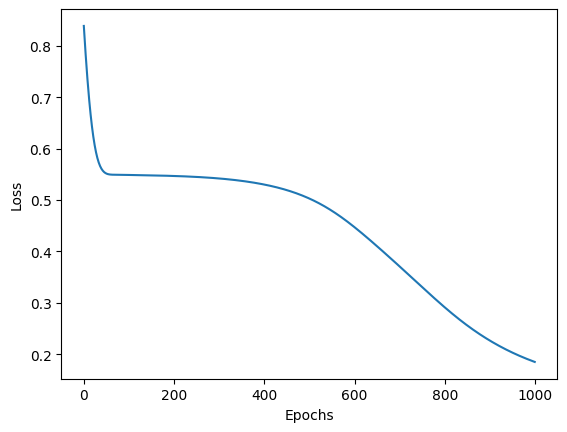

Training Losses are 
          0
0  0.599657
1  0.594060
2  0.588826
3  0.583957
4  0.579454
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 32
[[2972   72]
 [ 140  816]]
Accuracy: 0.9470, Precision: 0.9189, Recall: 0.8536, F1-score: 0.8850

Test Data
Confusion Matrix for hiden layer 8 and 64 and 32
[[2970   74]
 [ 125  831]]
Accuracy: 0.9503, Precision: 0.9182, Recall: 0.8692, F1-score: 0.8931



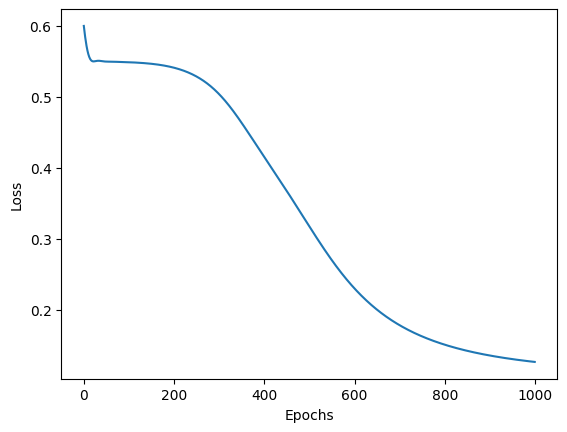

Training Losses are 
          0
0  0.649454
1  0.641398
2  0.633705
3  0.626379
4  0.619425
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 64
[[2998   46]
 [ 197  759]]
Accuracy: 0.9393, Precision: 0.9429, Recall: 0.7939, F1-score: 0.8620

Test Data
Confusion Matrix for hiden layer 8 and 64 and 64
[[2993   51]
 [ 193  763]]
Accuracy: 0.9390, Precision: 0.9373, Recall: 0.7981, F1-score: 0.8621



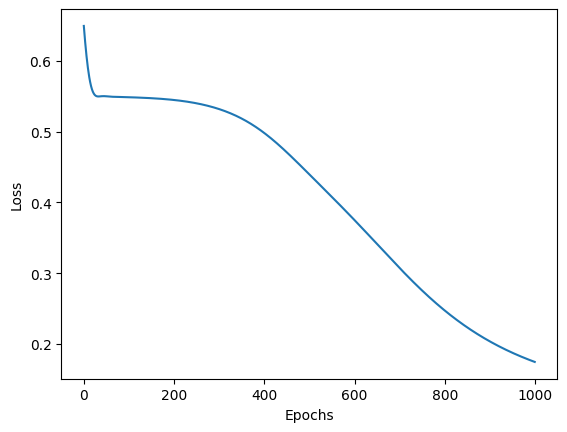

Training Losses are 
          0
0  0.861396
1  0.858182
2  0.854994
3  0.851832
4  0.848696
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


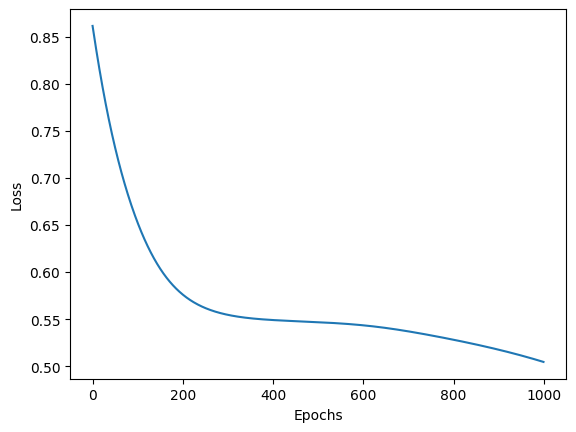

Training Losses are 
          0
0  0.612223
1  0.610768
2  0.609333
3  0.607917
4  0.606520
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 16
[[3027   17]
 [ 413  543]]
Accuracy: 0.8925, Precision: 0.9696, Recall: 0.5680, F1-score: 0.7164

Test Data
Confusion Matrix for hiden layer 16 and 8 and 16
[[3025   19]
 [ 394  562]]
Accuracy: 0.8968, Precision: 0.9673, Recall: 0.5879, F1-score: 0.7313



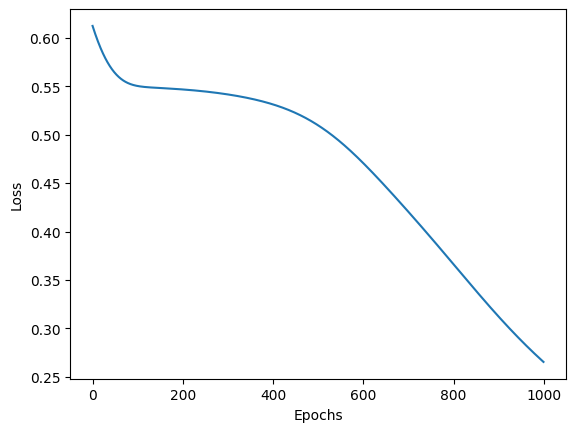

Training Losses are 
          0
0  0.573242
1  0.572394
2  0.571561
3  0.570745
4  0.569944
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 32
[[3011   33]
 [ 229  727]]
Accuracy: 0.9345, Precision: 0.9566, Recall: 0.7605, F1-score: 0.8473

Test Data
Confusion Matrix for hiden layer 16 and 8 and 32
[[3002   42]
 [ 221  735]]
Accuracy: 0.9343, Precision: 0.9459, Recall: 0.7688, F1-score: 0.8482



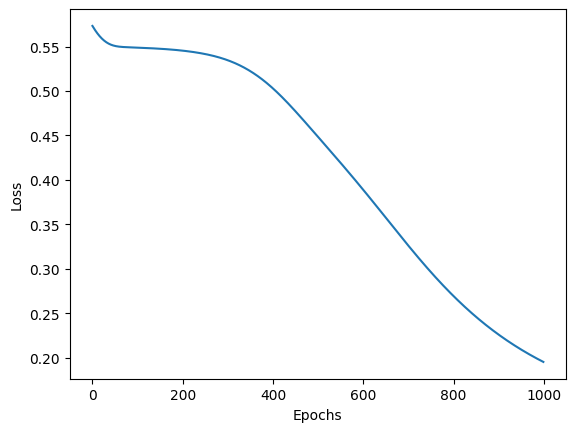

Training Losses are 
          0
0  0.741673
1  0.739069
2  0.736485
3  0.733922
4  0.731380
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 8 and 64
[[3044    0]
 [ 955    1]]
Accuracy: 0.7612, Precision: 1.0000, Recall: 0.0010, F1-score: 0.0021



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


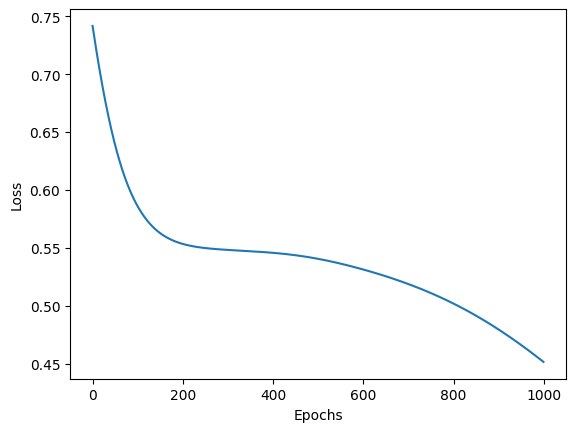

Training Losses are 
          0
0  0.749162
1  0.744826
2  0.740543
3  0.736313
4  0.732136
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 8
[[3018   26]
 [ 374  582]]
Accuracy: 0.9000, Precision: 0.9572, Recall: 0.6088, F1-score: 0.7442

Test Data
Confusion Matrix for hiden layer 16 and 16 and 8
[[3012   32]
 [ 359  597]]
Accuracy: 0.9022, Precision: 0.9491, Recall: 0.6245, F1-score: 0.7533



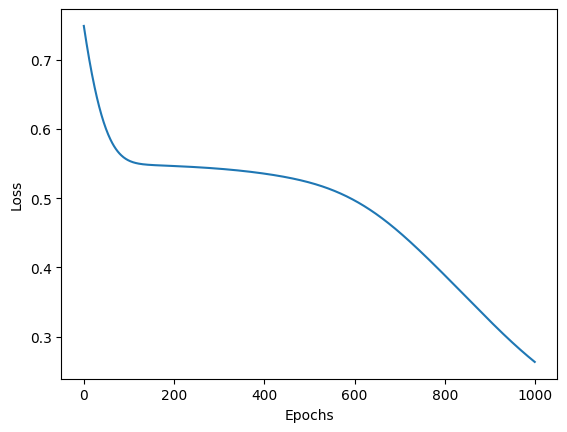

Training Losses are 
          0
0  0.644146
1  0.641160
2  0.638226
3  0.635346
4  0.632518
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 16
[[2996   48]
 [ 211  745]]
Accuracy: 0.9353, Precision: 0.9395, Recall: 0.7793, F1-score: 0.8519

Test Data
Confusion Matrix for hiden layer 16 and 16 and 16
[[2995   49]
 [ 210  746]]
Accuracy: 0.9353, Precision: 0.9384, Recall: 0.7803, F1-score: 0.8521



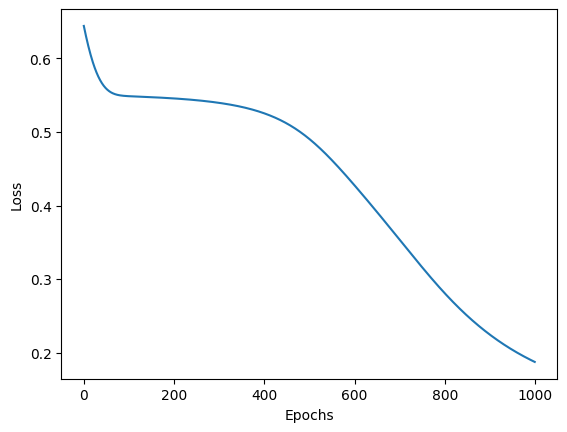

Training Losses are 
          0
0  0.667141
1  0.663947
2  0.660796
3  0.657687
4  0.654622
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 32
[[3006   38]
 [ 246  710]]
Accuracy: 0.9290, Precision: 0.9492, Recall: 0.7427, F1-score: 0.8333

Test Data
Confusion Matrix for hiden layer 16 and 16 and 32
[[3003   41]
 [ 247  709]]
Accuracy: 0.9280, Precision: 0.9453, Recall: 0.7416, F1-score: 0.8312



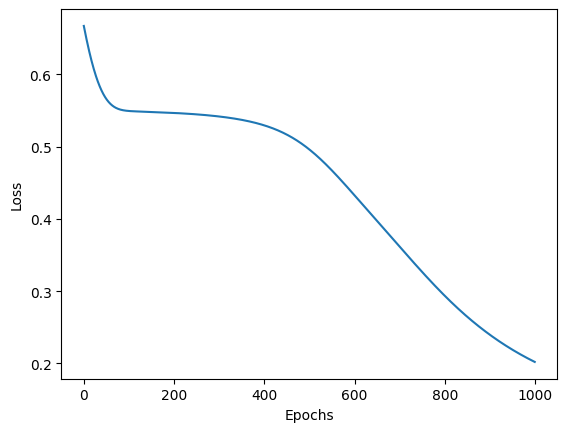

Training Losses are 
          0
0  0.752466
1  0.748023
2  0.743645
3  0.739333
4  0.735087
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 64
[[3041    3]
 [ 705  251]]
Accuracy: 0.8230, Precision: 0.9882, Recall: 0.2626, F1-score: 0.4149

Test Data
Confusion Matrix for hiden layer 16 and 16 and 64
[[3034   10]
 [ 699  257]]
Accuracy: 0.8227, Precision: 0.9625, Recall: 0.2688, F1-score: 0.4203



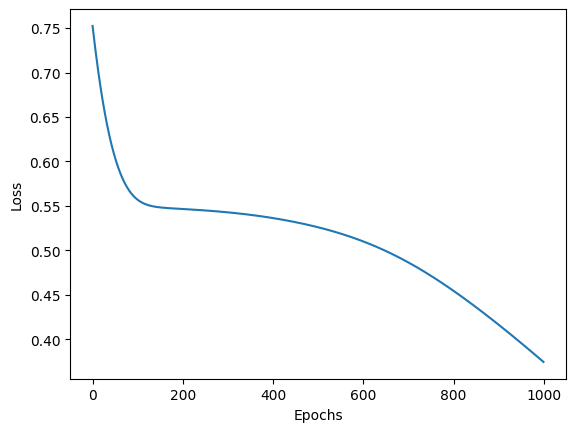

Training Losses are 
          0
0  0.759111
1  0.751843
2  0.744718
3  0.737738
4  0.730902
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 8
[[3016   28]
 [ 441  515]]
Accuracy: 0.8828, Precision: 0.9484, Recall: 0.5387, F1-score: 0.6871

Test Data
Confusion Matrix for hiden layer 16 and 32 and 8
[[3008   36]
 [ 416  540]]
Accuracy: 0.8870, Precision: 0.9375, Recall: 0.5649, F1-score: 0.7050



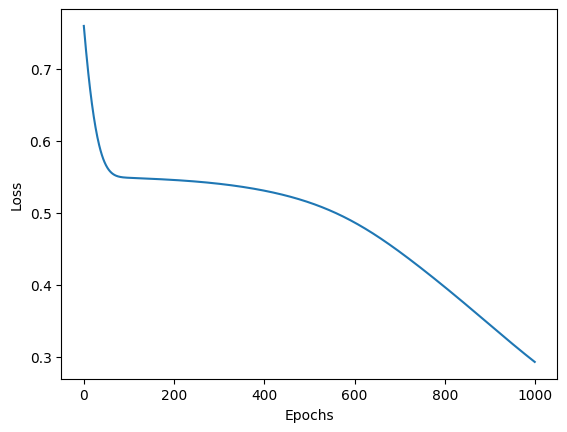

Training Losses are 
          0
0  0.640623
1  0.635956
2  0.631424
3  0.627029
4  0.622773
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 16
[[2979   65]
 [ 170  786]]
Accuracy: 0.9413, Precision: 0.9236, Recall: 0.8222, F1-score: 0.8700

Test Data
Confusion Matrix for hiden layer 16 and 32 and 16
[[2979   65]
 [ 159  797]]
Accuracy: 0.9440, Precision: 0.9246, Recall: 0.8337, F1-score: 0.8768



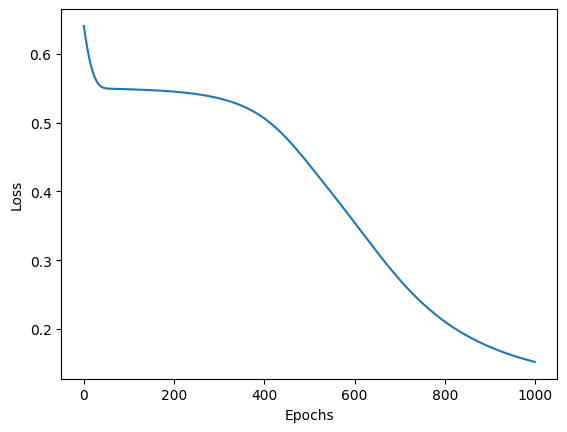

Training Losses are 
          0
0  0.673385
1  0.667507
2  0.661780
3  0.656204
4  0.650781
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 32
[[2984   60]
 [ 193  763]]
Accuracy: 0.9367, Precision: 0.9271, Recall: 0.7981, F1-score: 0.8578

Test Data
Confusion Matrix for hiden layer 16 and 32 and 32
[[2982   62]
 [ 179  777]]
Accuracy: 0.9397, Precision: 0.9261, Recall: 0.8128, F1-score: 0.8657



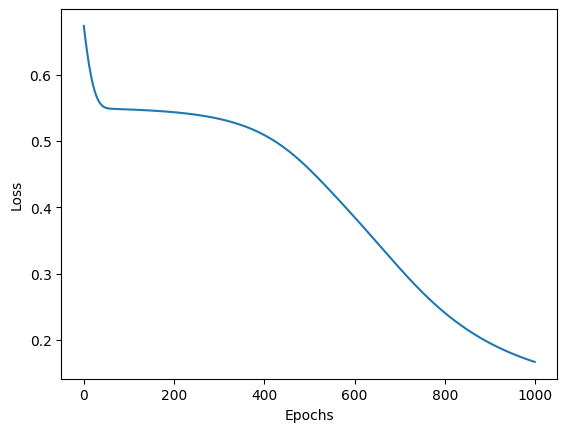

Training Losses are 
          0
0  0.617720
1  0.613418
2  0.609272
3  0.605283
4  0.601453
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 64
[[2977   67]
 [ 150  806]]
Accuracy: 0.9457, Precision: 0.9233, Recall: 0.8431, F1-score: 0.8814

Test Data
Confusion Matrix for hiden layer 16 and 32 and 64
[[2973   71]
 [ 137  819]]
Accuracy: 0.9480, Precision: 0.9202, Recall: 0.8567, F1-score: 0.8873



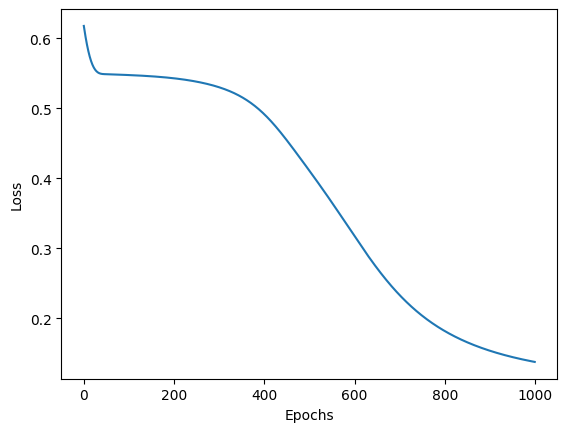

Training Losses are 
          0
0  0.644960
1  0.636435
2  0.628340
3  0.620679
4  0.613455
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 8
[[2969   75]
 [ 134  822]]
Accuracy: 0.9477, Precision: 0.9164, Recall: 0.8598, F1-score: 0.8872

Test Data
Confusion Matrix for hiden layer 16 and 64 and 8
[[2967   77]
 [ 112  844]]
Accuracy: 0.9527, Precision: 0.9164, Recall: 0.8828, F1-score: 0.8993



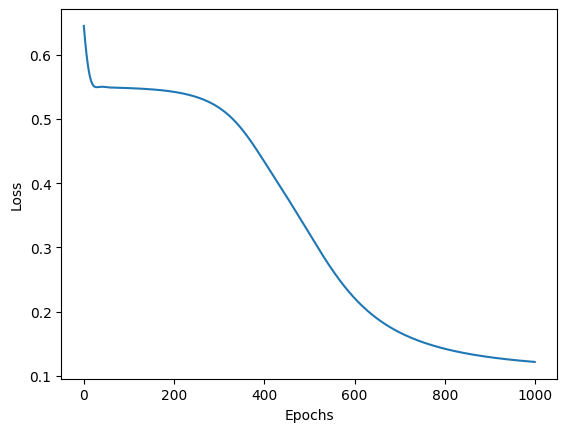

Training Losses are 
          0
0  0.757936
1  0.744713
2  0.731953
3  0.719665
4  0.707855
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 16
[[2974   70]
 [ 150  806]]
Accuracy: 0.9450, Precision: 0.9201, Recall: 0.8431, F1-score: 0.8799

Test Data
Confusion Matrix for hiden layer 16 and 64 and 16
[[2971   73]
 [ 136  820]]
Accuracy: 0.9477, Precision: 0.9183, Recall: 0.8577, F1-score: 0.8870



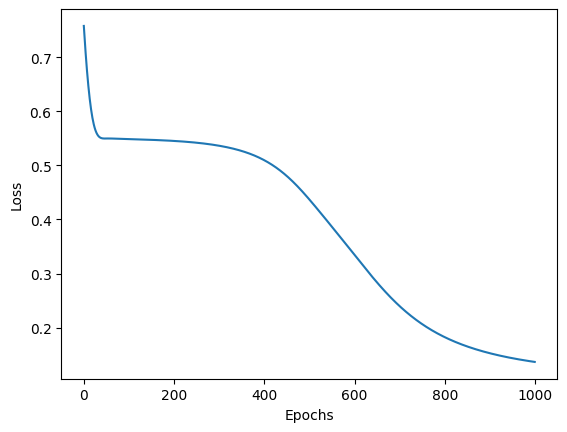

Training Losses are 
          0
0  0.755704
1  0.742803
2  0.730364
3  0.718390
4  0.706885
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 32
[[2984   60]
 [ 189  767]]
Accuracy: 0.9377, Precision: 0.9274, Recall: 0.8023, F1-score: 0.8603

Test Data
Confusion Matrix for hiden layer 16 and 64 and 32
[[2983   61]
 [ 178  778]]
Accuracy: 0.9403, Precision: 0.9273, Recall: 0.8138, F1-score: 0.8669



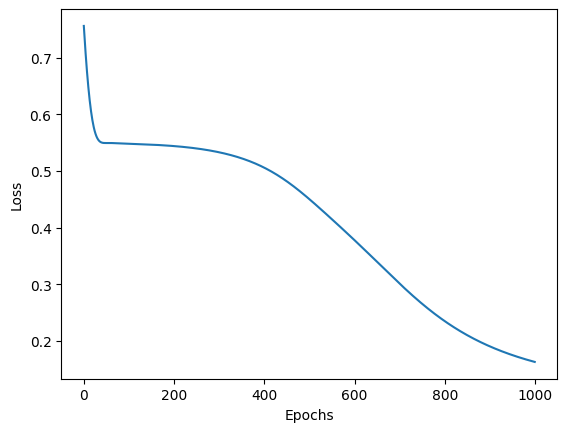

Training Losses are 
          0
0  0.713290
1  0.701532
2  0.690248
3  0.679444
4  0.669124
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 64
[[2997   47]
 [ 225  731]]
Accuracy: 0.9320, Precision: 0.9396, Recall: 0.7646, F1-score: 0.8431

Test Data
Confusion Matrix for hiden layer 16 and 64 and 64
[[2992   52]
 [ 219  737]]
Accuracy: 0.9323, Precision: 0.9341, Recall: 0.7709, F1-score: 0.8447



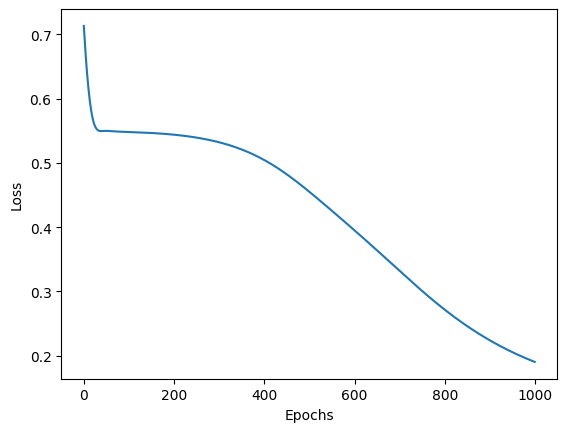

Training Losses are 
          0
0  0.727888
1  0.724962
2  0.722067
3  0.719202
4  0.716369
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 8
[[3039    5]
 [ 581  375]]
Accuracy: 0.8535, Precision: 0.9868, Recall: 0.3923, F1-score: 0.5614

Test Data
Confusion Matrix for hiden layer 32 and 8 and 8
[[3039    5]
 [ 579  377]]
Accuracy: 0.8540, Precision: 0.9869, Recall: 0.3944, F1-score: 0.5635



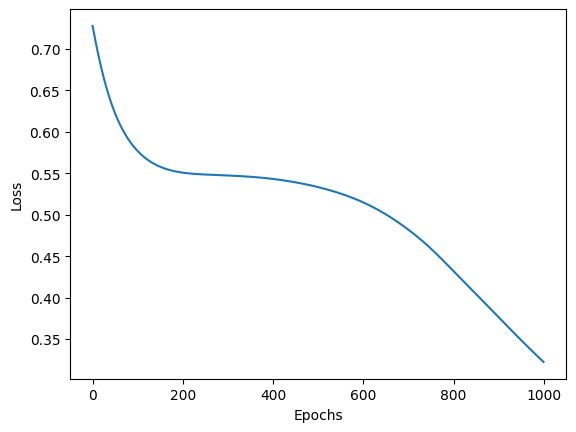

Training Losses are 
          0
0  0.584875
1  0.583544
2  0.582235
3  0.580951
4  0.579690
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 16
[[2982   62]
 [ 155  801]]
Accuracy: 0.9457, Precision: 0.9282, Recall: 0.8379, F1-score: 0.8807

Test Data
Confusion Matrix for hiden layer 32 and 8 and 16
[[2980   64]
 [ 143  813]]
Accuracy: 0.9483, Precision: 0.9270, Recall: 0.8504, F1-score: 0.8871



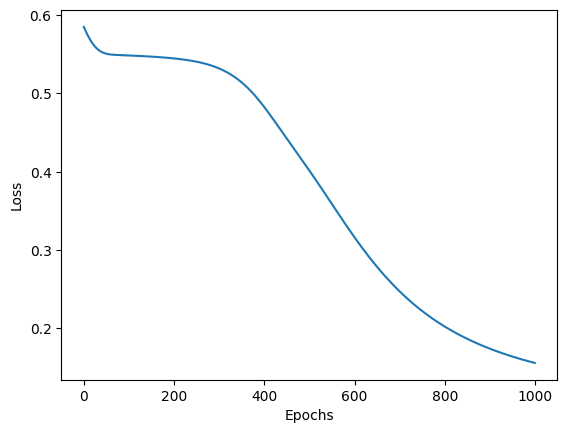

Training Losses are 
          0
0  0.781144
1  0.777053
2  0.773001
3  0.768988
4  0.765015
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 32
[[3023   21]
 [ 526  430]]
Accuracy: 0.8632, Precision: 0.9534, Recall: 0.4498, F1-score: 0.6112

Test Data
Confusion Matrix for hiden layer 32 and 8 and 32
[[3025   19]
 [ 522  434]]
Accuracy: 0.8648, Precision: 0.9581, Recall: 0.4540, F1-score: 0.6160



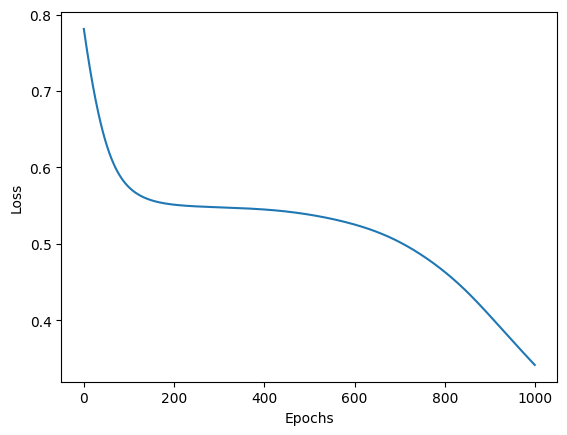

Training Losses are 
          0
0  0.590899
1  0.589447
2  0.588021
3  0.586622
4  0.585249
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 64
[[2997   47]
 [ 192  764]]
Accuracy: 0.9403, Precision: 0.9420, Recall: 0.7992, F1-score: 0.8647

Test Data
Confusion Matrix for hiden layer 32 and 8 and 64
[[2995   49]
 [ 185  771]]
Accuracy: 0.9415, Precision: 0.9402, Recall: 0.8065, F1-score: 0.8682



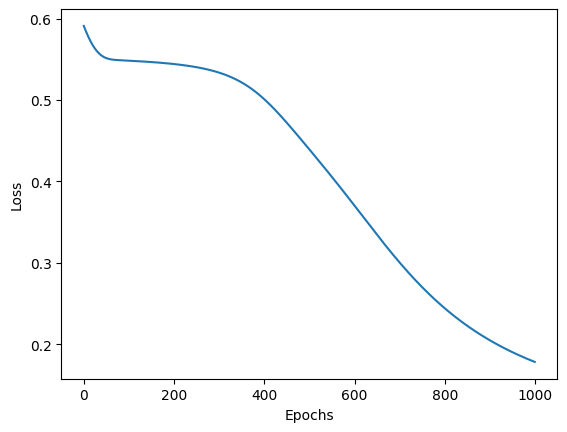

Training Losses are 
          0
0  0.668235
1  0.664382
2  0.660603
3  0.656896
4  0.653263
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 8
[[2975   69]
 [ 163  793]]
Accuracy: 0.9420, Precision: 0.9200, Recall: 0.8295, F1-score: 0.8724

Test Data
Confusion Matrix for hiden layer 32 and 16 and 8
[[2974   70]
 [ 154  802]]
Accuracy: 0.9440, Precision: 0.9197, Recall: 0.8389, F1-score: 0.8775



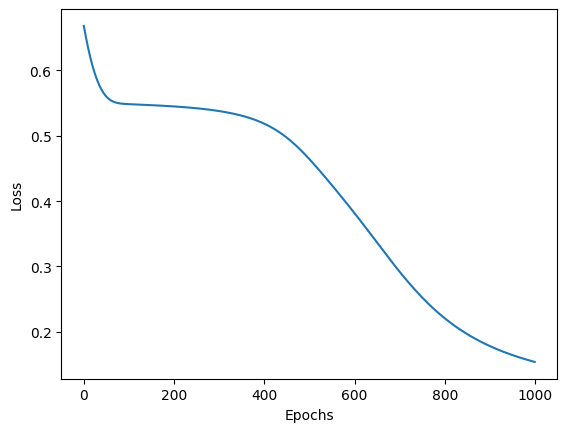

Training Losses are 
          0
0  0.615834
1  0.612475
2  0.609202
3  0.606018
4  0.602923
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 16
[[2968   76]
 [ 143  813]]
Accuracy: 0.9453, Precision: 0.9145, Recall: 0.8504, F1-score: 0.8813

Test Data
Confusion Matrix for hiden layer 32 and 16 and 16
[[2966   78]
 [ 128  828]]
Accuracy: 0.9485, Precision: 0.9139, Recall: 0.8661, F1-score: 0.8894



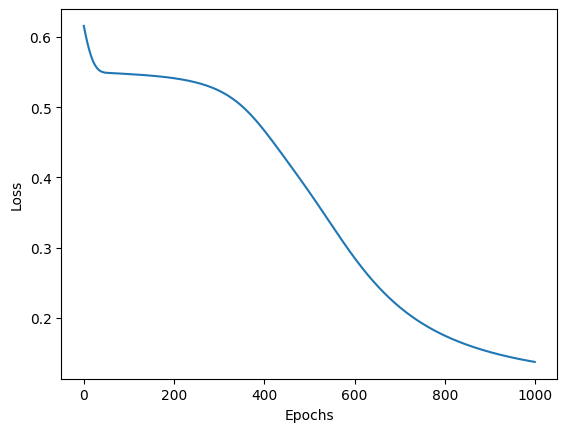

Training Losses are 
          0
0  0.669644
1  0.665506
2  0.661449
3  0.657474
4  0.653583
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 32
[[2974   70]
 [ 165  791]]
Accuracy: 0.9413, Precision: 0.9187, Recall: 0.8274, F1-score: 0.8707

Test Data
Confusion Matrix for hiden layer 32 and 16 and 32
[[2969   75]
 [ 152  804]]
Accuracy: 0.9433, Precision: 0.9147, Recall: 0.8410, F1-score: 0.8763



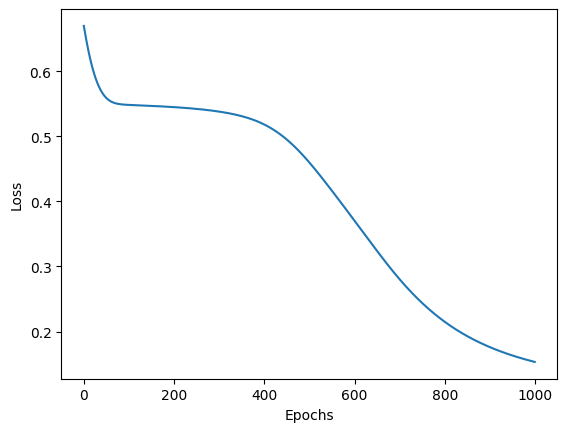

Training Losses are 
          0
0  0.844438
1  0.837703
2  0.831060
3  0.824510
4  0.818051
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 64
[[3036    8]
 [ 600  356]]
Accuracy: 0.8480, Precision: 0.9780, Recall: 0.3724, F1-score: 0.5394

Test Data
Confusion Matrix for hiden layer 32 and 16 and 64
[[3032   12]
 [ 620  336]]
Accuracy: 0.8420, Precision: 0.9655, Recall: 0.3515, F1-score: 0.5153



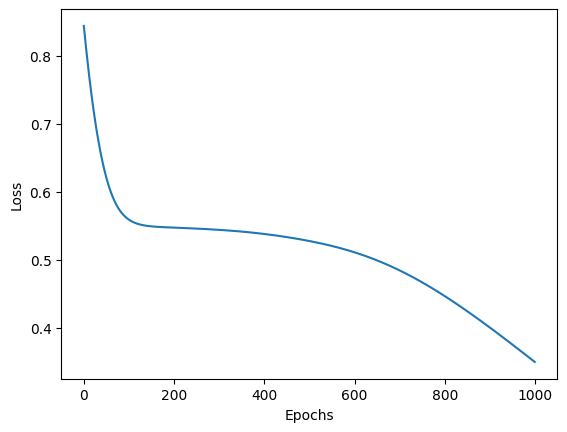

Training Losses are 
          0
0  0.708923
1  0.700912
2  0.693130
3  0.685581
4  0.678268
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 8
[[2987   57]
 [ 203  753]]
Accuracy: 0.9350, Precision: 0.9296, Recall: 0.7877, F1-score: 0.8528

Test Data
Confusion Matrix for hiden layer 32 and 32 and 8
[[2984   60]
 [ 199  757]]
Accuracy: 0.9353, Precision: 0.9266, Recall: 0.7918, F1-score: 0.8539



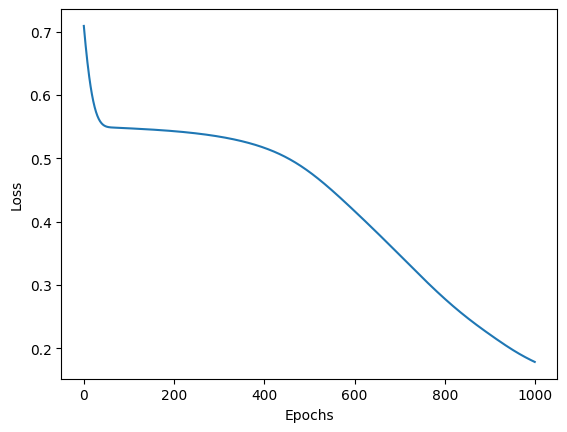

Training Losses are 
          0
0  0.653773
1  0.647602
2  0.641634
3  0.635872
4  0.630319
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 16
[[2968   76]
 [ 145  811]]
Accuracy: 0.9447, Precision: 0.9143, Recall: 0.8483, F1-score: 0.8801

Test Data
Confusion Matrix for hiden layer 32 and 32 and 16
[[2967   77]
 [ 131  825]]
Accuracy: 0.9480, Precision: 0.9146, Recall: 0.8630, F1-score: 0.8881



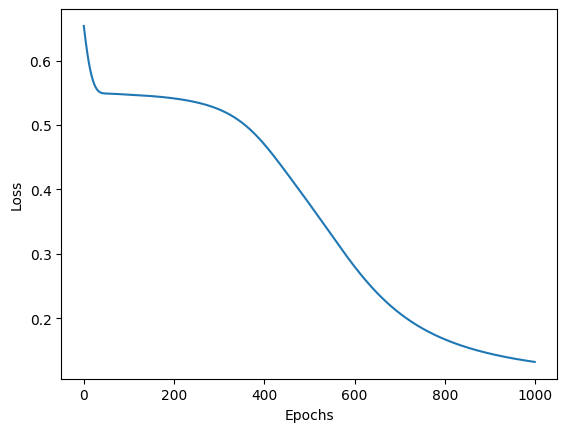

Training Losses are 
          0
0  0.721508
1  0.712150
2  0.703080
3  0.694301
4  0.685818
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 32
[[2971   73]
 [ 169  787]]
Accuracy: 0.9395, Precision: 0.9151, Recall: 0.8232, F1-score: 0.8667

Test Data
Confusion Matrix for hiden layer 32 and 32 and 32
[[2974   70]
 [ 156  800]]
Accuracy: 0.9435, Precision: 0.9195, Recall: 0.8368, F1-score: 0.8762



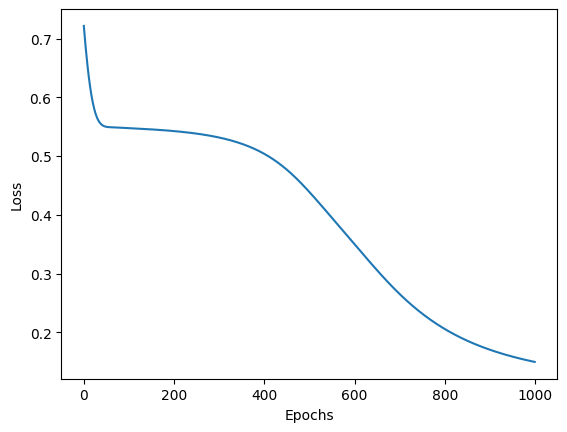

Training Losses are 
          0
0  0.765128
1  0.755711
2  0.746516
3  0.737549
4  0.728811
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 64
[[2982   62]
 [ 189  767]]
Accuracy: 0.9373, Precision: 0.9252, Recall: 0.8023, F1-score: 0.8594

Test Data
Confusion Matrix for hiden layer 32 and 32 and 64
[[2982   62]
 [ 176  780]]
Accuracy: 0.9405, Precision: 0.9264, Recall: 0.8159, F1-score: 0.8676



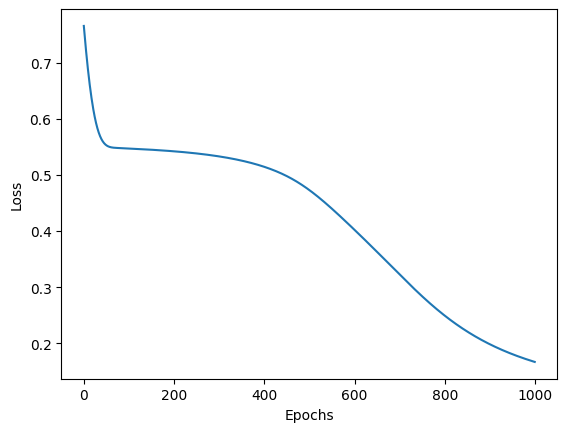

Training Losses are 
          0
0  0.709317
1  0.695732
2  0.682800
3  0.670530
4  0.658929
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 8
[[2966   78]
 [ 143  813]]
Accuracy: 0.9447, Precision: 0.9125, Recall: 0.8504, F1-score: 0.8803

Test Data
Confusion Matrix for hiden layer 32 and 64 and 8
[[2968   76]
 [ 128  828]]
Accuracy: 0.9490, Precision: 0.9159, Recall: 0.8661, F1-score: 0.8903



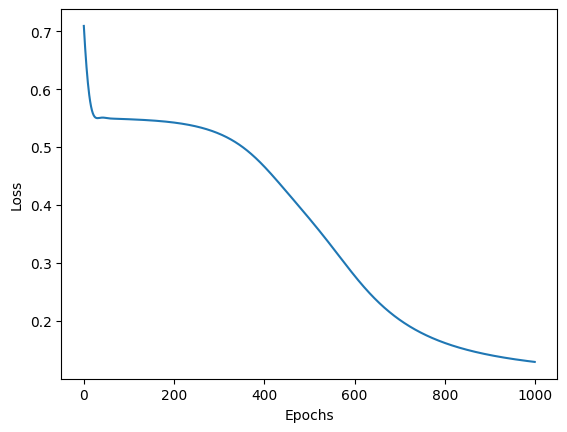

Training Losses are 
          0
0  0.643908
1  0.633926
2  0.624552
3  0.615793
4  0.607651
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 16
[[2959   85]
 [ 122  834]]
Accuracy: 0.9483, Precision: 0.9075, Recall: 0.8724, F1-score: 0.8896

Test Data
Confusion Matrix for hiden layer 32 and 64 and 16
[[2959   85]
 [ 106  850]]
Accuracy: 0.9523, Precision: 0.9091, Recall: 0.8891, F1-score: 0.8990



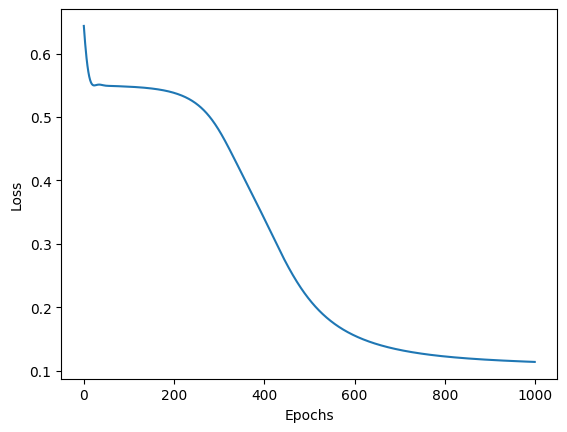

Training Losses are 
          0
0  0.802343
1  0.785712
2  0.769674
3  0.754239
4  0.739417
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 32
[[2975   69]
 [ 174  782]]
Accuracy: 0.9393, Precision: 0.9189, Recall: 0.8180, F1-score: 0.8655

Test Data
Confusion Matrix for hiden layer 32 and 64 and 32
[[2978   66]
 [ 163  793]]
Accuracy: 0.9427, Precision: 0.9232, Recall: 0.8295, F1-score: 0.8738



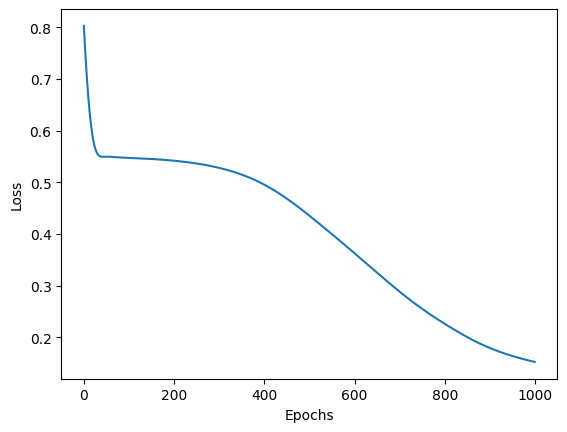

Training Losses are 
          0
0  0.625886
1  0.616706
2  0.608170
3  0.600281
4  0.593040
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 64
[[2964   80]
 [ 126  830]]
Accuracy: 0.9485, Precision: 0.9121, Recall: 0.8682, F1-score: 0.8896

Test Data
Confusion Matrix for hiden layer 32 and 64 and 64
[[2962   82]
 [ 106  850]]
Accuracy: 0.9530, Precision: 0.9120, Recall: 0.8891, F1-score: 0.9004



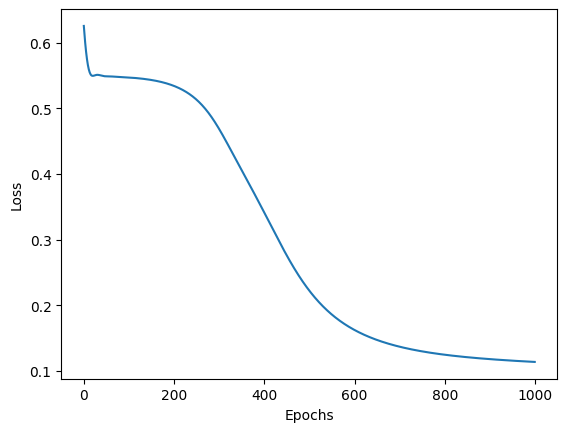

Training Losses are 
          0
0  0.853449
1  0.847111
2  0.840879
3  0.834753
4  0.828730
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 8
[[3035    9]
 [ 667  289]]
Accuracy: 0.8310, Precision: 0.9698, Recall: 0.3023, F1-score: 0.4609

Test Data
Confusion Matrix for hiden layer 64 and 8 and 8
[[3035    9]
 [ 660  296]]
Accuracy: 0.8327, Precision: 0.9705, Recall: 0.3096, F1-score: 0.4695



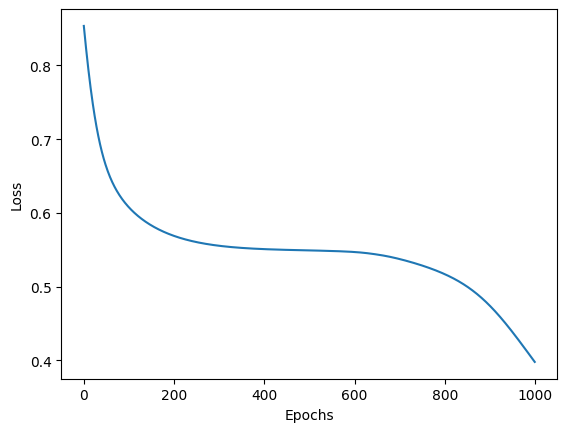

Training Losses are 
          0
0  0.779603
1  0.773544
2  0.767581
3  0.761716
4  0.755953
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 16
[[3002   42]
 [ 310  646]]
Accuracy: 0.9120, Precision: 0.9390, Recall: 0.6757, F1-score: 0.7859

Test Data
Confusion Matrix for hiden layer 64 and 8 and 16
[[3003   41]
 [ 303  653]]
Accuracy: 0.9140, Precision: 0.9409, Recall: 0.6831, F1-score: 0.7915



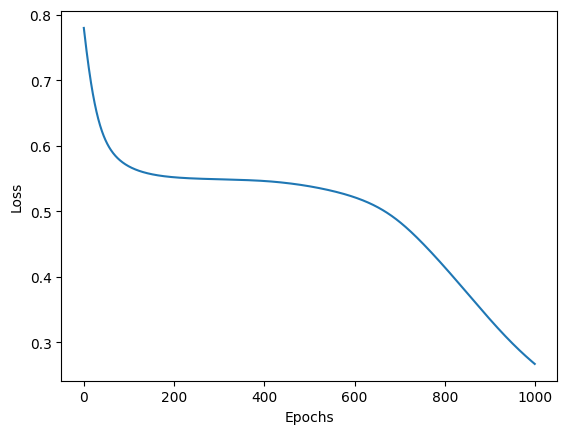

Training Losses are 
          0
0  0.828444
1  0.820864
2  0.813390
3  0.806026
4  0.798777
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 32
[[3001   43]
 [ 322  634]]
Accuracy: 0.9087, Precision: 0.9365, Recall: 0.6632, F1-score: 0.7765

Test Data
Confusion Matrix for hiden layer 64 and 8 and 32
[[3005   39]
 [ 313  643]]
Accuracy: 0.9120, Precision: 0.9428, Recall: 0.6726, F1-score: 0.7851



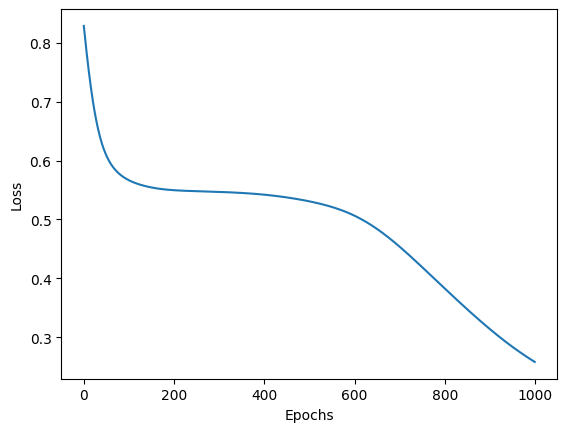

Training Losses are 
          0
0  0.640625
1  0.637385
2  0.634212
3  0.631108
4  0.628075
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 64
[[2971   73]
 [ 163  793]]
Accuracy: 0.9410, Precision: 0.9157, Recall: 0.8295, F1-score: 0.8705

Test Data
Confusion Matrix for hiden layer 64 and 8 and 64
[[2970   74]
 [ 146  810]]
Accuracy: 0.9450, Precision: 0.9163, Recall: 0.8473, F1-score: 0.8804



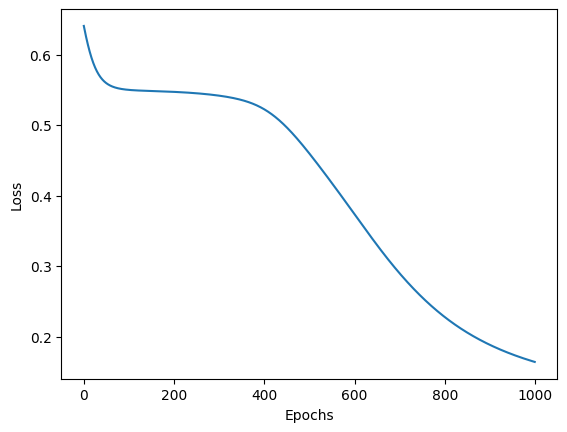

Training Losses are 
          0
0  0.888858
1  0.876616
2  0.864632
3  0.852914
4  0.841466
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 8
[[2991   53]
 [ 350  606]]
Accuracy: 0.8992, Precision: 0.9196, Recall: 0.6339, F1-score: 0.7505

Test Data
Confusion Matrix for hiden layer 64 and 16 and 8
[[3000   44]
 [ 324  632]]
Accuracy: 0.9080, Precision: 0.9349, Recall: 0.6611, F1-score: 0.7745



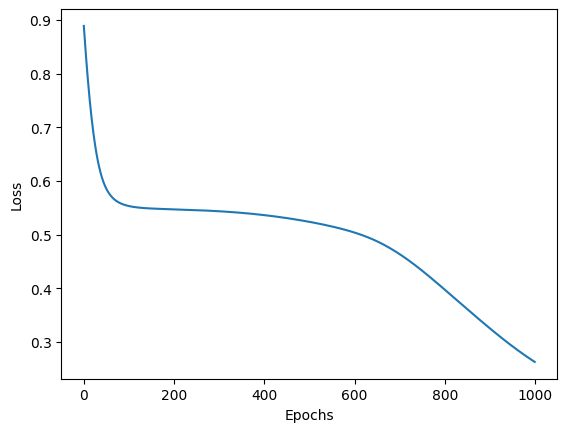

Training Losses are 
          0
0  0.766626
1  0.758547
2  0.750660
3  0.742969
4  0.735478
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 16
[[2969   75]
 [ 176  780]]
Accuracy: 0.9373, Precision: 0.9123, Recall: 0.8159, F1-score: 0.8614

Test Data
Confusion Matrix for hiden layer 64 and 16 and 16
[[2971   73]
 [ 165  791]]
Accuracy: 0.9405, Precision: 0.9155, Recall: 0.8274, F1-score: 0.8692



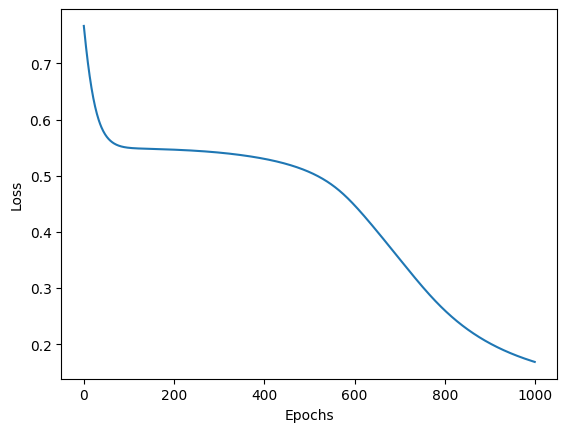

Training Losses are 
          0
0  0.776666
1  0.767935
2  0.759413
3  0.751102
4  0.743007
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 32
[[2981   63]
 [ 232  724]]
Accuracy: 0.9263, Precision: 0.9199, Recall: 0.7573, F1-score: 0.8308

Test Data
Confusion Matrix for hiden layer 64 and 16 and 32
[[2985   59]
 [ 232  724]]
Accuracy: 0.9273, Precision: 0.9246, Recall: 0.7573, F1-score: 0.8327



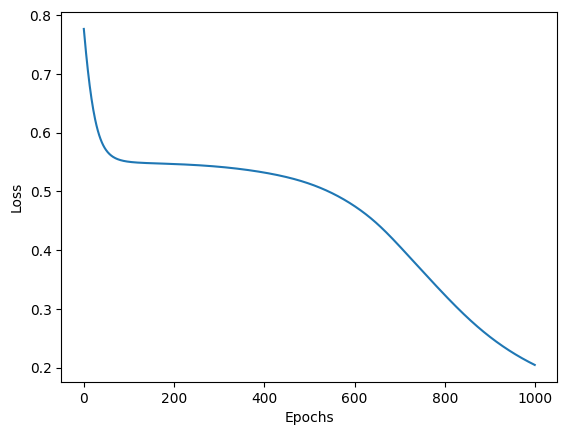

Training Losses are 
          0
0  0.727870
1  0.721350
2  0.714958
3  0.708699
4  0.702576
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 64
[[2964   80]
 [ 158  798]]
Accuracy: 0.9405, Precision: 0.9089, Recall: 0.8347, F1-score: 0.8702

Test Data
Confusion Matrix for hiden layer 64 and 16 and 64
[[2962   82]
 [ 145  811]]
Accuracy: 0.9433, Precision: 0.9082, Recall: 0.8483, F1-score: 0.8772



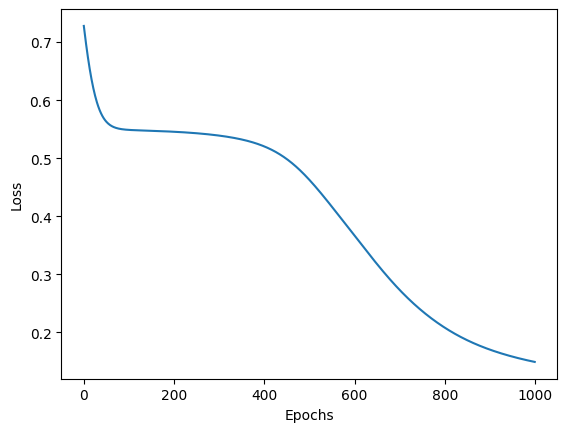

Training Losses are 
          0
0  0.604773
1  0.598651
2  0.592925
3  0.587598
4  0.582668
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 8
[[2960   84]
 [ 118  838]]
Accuracy: 0.9495, Precision: 0.9089, Recall: 0.8766, F1-score: 0.8924

Test Data
Confusion Matrix for hiden layer 64 and 32 and 8
[[2961   83]
 [ 101  855]]
Accuracy: 0.9540, Precision: 0.9115, Recall: 0.8944, F1-score: 0.9029



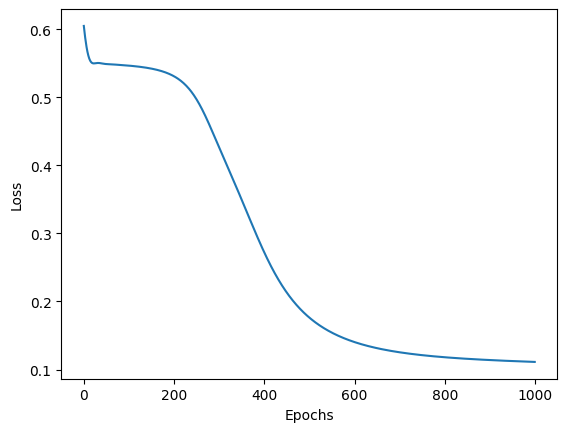

Training Losses are 
          0
0  0.680955
1  0.670899
2  0.661294
3  0.652147
4  0.643461
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 16
[[2965   79]
 [ 127  829]]
Accuracy: 0.9485, Precision: 0.9130, Recall: 0.8672, F1-score: 0.8895

Test Data
Confusion Matrix for hiden layer 64 and 32 and 16
[[2961   83]
 [ 109  847]]
Accuracy: 0.9520, Precision: 0.9108, Recall: 0.8860, F1-score: 0.8982



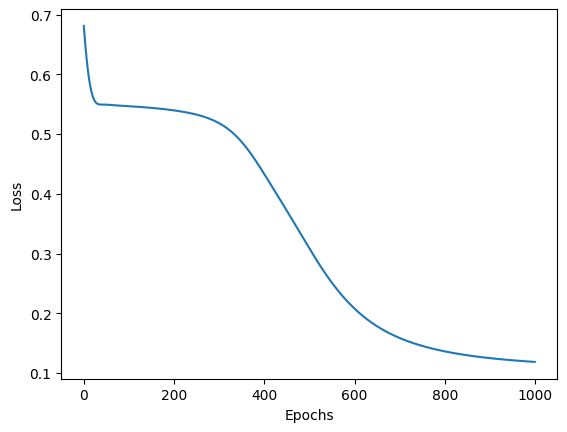

Training Losses are 
          0
0  0.603130
1  0.597065
2  0.591387
3  0.586102
4  0.581212
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 32
[[2961   83]
 [ 117  839]]
Accuracy: 0.9500, Precision: 0.9100, Recall: 0.8776, F1-score: 0.8935

Test Data
Confusion Matrix for hiden layer 64 and 32 and 32
[[2964   80]
 [ 100  856]]
Accuracy: 0.9550, Precision: 0.9145, Recall: 0.8954, F1-score: 0.9049



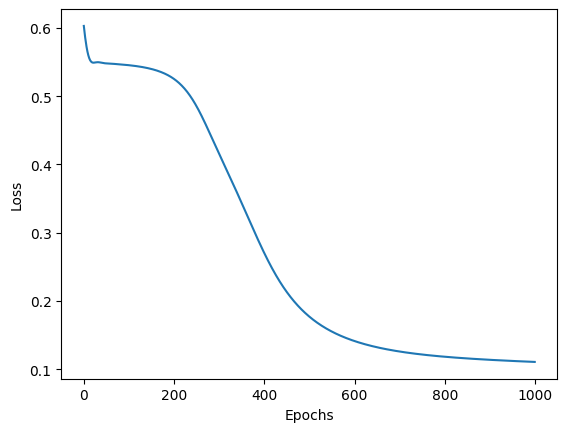

Training Losses are 
          0
0  0.912117
1  0.893363
2  0.875163
3  0.857532
4  0.840481
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 64
[[2972   72]
 [ 199  757]]
Accuracy: 0.9323, Precision: 0.9131, Recall: 0.7918, F1-score: 0.8482

Test Data
Confusion Matrix for hiden layer 64 and 32 and 64
[[2977   67]
 [ 196  760]]
Accuracy: 0.9343, Precision: 0.9190, Recall: 0.7950, F1-score: 0.8525



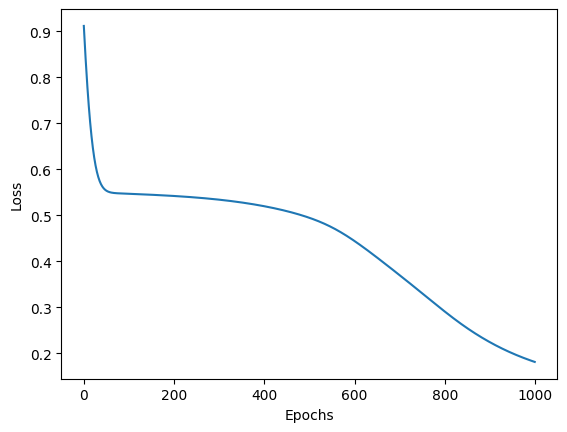

Training Losses are 
          0
0  0.630840
1  0.619451
2  0.609002
3  0.599500
4  0.590941
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 8
[[2957   87]
 [ 114  842]]
Accuracy: 0.9497, Precision: 0.9064, Recall: 0.8808, F1-score: 0.8934

Test Data
Confusion Matrix for hiden layer 64 and 64 and 8
[[2960   84]
 [  94  862]]
Accuracy: 0.9555, Precision: 0.9112, Recall: 0.9017, F1-score: 0.9064



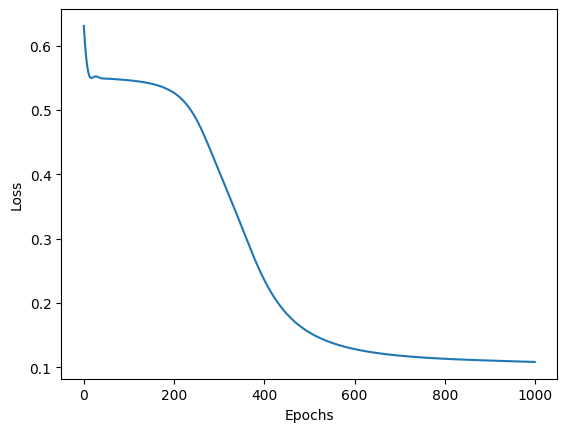

Training Losses are 
          0
0  0.708794
1  0.689608
2  0.671771
3  0.655295
4  0.640184
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 16
[[2962   82]
 [ 123  833]]
Accuracy: 0.9487, Precision: 0.9104, Recall: 0.8713, F1-score: 0.8904

Test Data
Confusion Matrix for hiden layer 64 and 64 and 16
[[2964   80]
 [ 107  849]]
Accuracy: 0.9533, Precision: 0.9139, Recall: 0.8881, F1-score: 0.9008



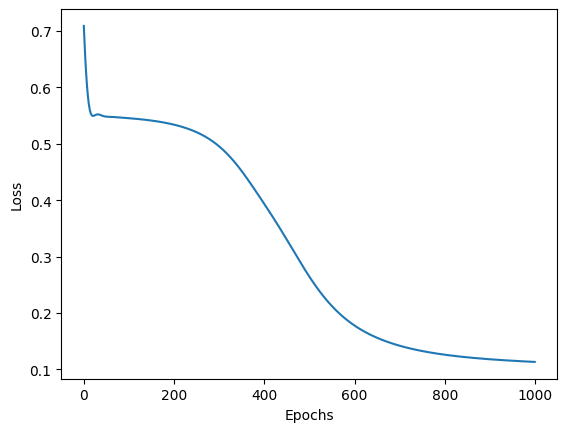

Training Losses are 
          0
0  0.714332
1  0.696461
2  0.679703
3  0.664073
4  0.649581
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 32
[[2962   82]
 [ 122  834]]
Accuracy: 0.9490, Precision: 0.9105, Recall: 0.8724, F1-score: 0.8910

Test Data
Confusion Matrix for hiden layer 64 and 64 and 32
[[2965   79]
 [ 103  853]]
Accuracy: 0.9545, Precision: 0.9152, Recall: 0.8923, F1-score: 0.9036



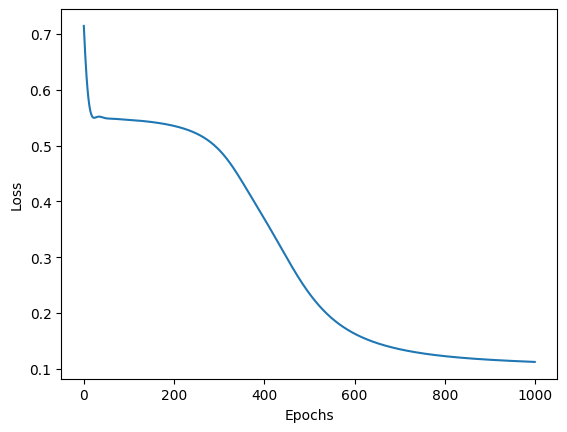

Training Losses are 
          0
0  0.874627
1  0.848752
2  0.824010
3  0.800431
4  0.778036
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 64
[[2964   80]
 [ 143  813]]
Accuracy: 0.9443, Precision: 0.9104, Recall: 0.8504, F1-score: 0.8794

Test Data
Confusion Matrix for hiden layer 64 and 64 and 64
[[2967   77]
 [ 130  826]]
Accuracy: 0.9483, Precision: 0.9147, Recall: 0.8640, F1-score: 0.8886



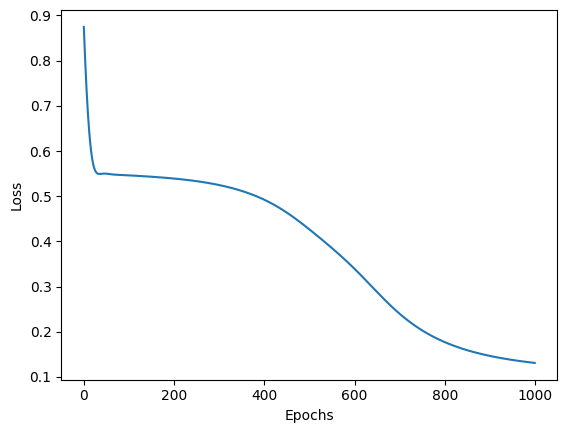

The best accuracy on test data is 0.9555 for layers 64 , 64, 8


In [16]:
nuerons = [8,16,32,64]
best_score=0
layer1=0
layer2=0
layer3=0
for nueron in nuerons:
  for double_nueron in nuerons:
    for triple_nueron in nuerons:
      model = DoubleLayer(33,nueron,double_nueron)
      criterion = nn.BCELoss() #Binary Classifiaction Loss
      optimizer = optim.Adam(model.parameters(), lr=0.001)
      epochs=1000
      loss_arr=[]
      for i in range(epochs):
            optimizer.zero_grad()
            model.train()
            outputs=model(X_train)
            outputs = outputs.view(-1, 1)
            loss = criterion(outputs, y_train.float())
            loss_arr.append(loss.detach().numpy())
            loss.backward()
            optimizer.step()
      print("Training Losses are ")
      loss_df = pd.DataFrame(loss_arr)
      print(loss_df.head())
      y_val_pred=model(X_val)
      y_val_pred=(y_val_pred>0.5).float()
      cm = confusion_matrix(y_val, y_val_pred)
      acc = accuracy_score(y_val, y_val_pred)
      precision = precision_score(y_val.numpy(), y_val_pred.numpy())
      recall = recall_score(y_val.numpy(), y_val_pred.numpy())
      f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
      print("Validation Data")
      print(f"Confusion Matrix for hidden layer {nueron} and {double_nueron} and {triple_nueron}")
      print(cm)
      print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
      y_test_pred=model(X_test)
      y_test_pred=(y_test_pred>0.5).float()
      cm = confusion_matrix(y_test, y_test_pred)
      acc = accuracy_score(y_test, y_test_pred)
      if acc > best_score:
          best_score=acc
          layer1=nueron
          layer2=double_nueron
          layer3=triple_nueron
      precision = precision_score(y_test.numpy(), y_test_pred.numpy())
      recall = recall_score(y_test.numpy(), y_test_pred.numpy())
      f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
      print("Test Data")
      print(f"Confusion Matrix for hiden layer {nueron} and {double_nueron} and {triple_nueron}")
      print(cm)
      print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
      plt.plot(range(epochs), loss_arr)
      plt.xlabel('Epochs')
      plt.ylabel('Loss')
      plt.show()
print(f"The best accuracy on test data is {best_score} for layers {layer1} , {layer2}, {layer3}")